In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import hvplot.pandas
import requests
import numpy as np

# Study data files
LAcrime_path = "Resources/Crime_Data_from_2020_to_Present.csv"

# Read the Los Angeles Crime data 
LACrime = pd.read_csv(LAcrime_path)

# Display the data table for preview
LACrime

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811658,231604807,01/27/2023 12:00:00 AM,01/26/2023 12:00:00 AM,1800,16,Foothill,1663,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,12500 BRANFORD ST,NaN,34.2466,-118.4054
811659,231606525,03/22/2023 12:00:00 AM,03/22/2023 12:00:00 AM,1000,16,Foothill,1602,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,12800 FILMORE ST,NaN,34.2790,-118.4116
811660,231210064,04/12/2023 12:00:00 AM,04/12/2023 12:00:00 AM,1630,12,77th Street,1239,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,6100 S VERMONT AV,NaN,33.9841,-118.2915
811661,230115220,07/02/2023 12:00:00 AM,07/01/2023 12:00:00 AM,1,1,Central,154,1,352,PICKPOCKET,...,IC,Invest Cont,352.0,NaN,NaN,NaN,500 S MAIN ST,NaN,34.0467,-118.2485


In [2]:
# remove unnessary columns : 
columns_to_drop = ["Date Rptd", "Part 1-2", "Mocodes", "Crm Cd 1", "Crm Cd 2", "Crm Cd 3", "Crm Cd 4", "Cross Street"]
dropped_LAcrime_df = LACrime.drop(columns=columns_to_drop)
dropped_LAcrime_df.head()

,DR_NO,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,LOCATION,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,2230,3,Southwest,377,624,BATTERY - SIMPLE ASSAULT,36,F,B,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,1100 W 39TH PL,34.0141,-118.2978
1,190101086,01/01/2020 12:00:00 AM,330,1,Central,163,624,BATTERY - SIMPLE ASSAULT,25,M,H,102.0,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,700 S HILL ST,34.0459,-118.2545
2,200110444,02/13/2020 12:00:00 AM,1200,1,Central,155,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,0,X,X,726.0,POLICE FACILITY,NaN,NaN,AA,Adult Arrest,200 E 6TH ST,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,W,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,5400 CORTEEN PL,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,415,19,Mission,1998,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,X,409.0,BEAUTY SUPPLY STORE,NaN,NaN,IC,Invest Cont,14400 TITUS ST,34.2198,-118.4468


In [3]:
# remove 2023 crime record from the data set because it is only update to Oct. 2023
# First, convert 'date_column' to a datetime format
dropped_LAcrime_df["DATE OCC"] = pd.to_datetime(dropped_LAcrime_df["DATE OCC"], format="%m/%d/%Y %I:%M:%S %p")

# Filter the DataFrame to keep only the rows with a year other than 2023
dropped_LAcrime_filtered = dropped_LAcrime_df[dropped_LAcrime_df["DATE OCC"].dt.year != 2023]
dropped_LAcrime_filtered.head()

,DR_NO,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,LOCATION,LAT,LON
0,10304468,2020-01-08,2230,3,Southwest,377,624,BATTERY - SIMPLE ASSAULT,36,F,B,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,1100 W 39TH PL,34.0141,-118.2978
1,190101086,2020-01-01,330,1,Central,163,624,BATTERY - SIMPLE ASSAULT,25,M,H,102.0,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,700 S HILL ST,34.0459,-118.2545
2,200110444,2020-02-13,1200,1,Central,155,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,0,X,X,726.0,POLICE FACILITY,NaN,NaN,AA,Adult Arrest,200 E 6TH ST,34.0448,-118.2474
3,191501505,2020-01-01,1730,15,N Hollywood,1543,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,W,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,5400 CORTEEN PL,34.1685,-118.4019
4,191921269,2020-01-01,415,19,Mission,1998,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,X,409.0,BEAUTY SUPPLY STORE,NaN,NaN,IC,Invest Cont,14400 TITUS ST,34.2198,-118.4468


In [4]:
# remove missing values rows in column Vict Descent, Premis Desc
# Make a copy of the DataFrame
dropNA_df = dropped_LAcrime_df.copy()

dropNA_df.dropna(subset=["Vict Descent", "Premis Desc"], inplace=True)
dropNA_df.head()

,DR_NO,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,LOCATION,LAT,LON
0,10304468,2020-01-08,2230,3,Southwest,377,624,BATTERY - SIMPLE ASSAULT,36,F,B,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,1100 W 39TH PL,34.0141,-118.2978
1,190101086,2020-01-01,330,1,Central,163,624,BATTERY - SIMPLE ASSAULT,25,M,H,102.0,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,700 S HILL ST,34.0459,-118.2545
2,200110444,2020-02-13,1200,1,Central,155,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,0,X,X,726.0,POLICE FACILITY,NaN,NaN,AA,Adult Arrest,200 E 6TH ST,34.0448,-118.2474
3,191501505,2020-01-01,1730,15,N Hollywood,1543,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,W,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,5400 CORTEEN PL,34.1685,-118.4019
4,191921269,2020-01-01,415,19,Mission,1998,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,X,409.0,BEAUTY SUPPLY STORE,NaN,NaN,IC,Invest Cont,14400 TITUS ST,34.2198,-118.4468


In [5]:
# Drop rows where any cell in the row contains "-"
dropNA_df = dropNA_df[~(dropNA_df == "-").any(axis=1)]
dropNA_df.head()

,DR_NO,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,LOCATION,LAT,LON
0,10304468,2020-01-08,2230,3,Southwest,377,624,BATTERY - SIMPLE ASSAULT,36,F,B,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,1100 W 39TH PL,34.0141,-118.2978
1,190101086,2020-01-01,330,1,Central,163,624,BATTERY - SIMPLE ASSAULT,25,M,H,102.0,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,700 S HILL ST,34.0459,-118.2545
2,200110444,2020-02-13,1200,1,Central,155,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,0,X,X,726.0,POLICE FACILITY,NaN,NaN,AA,Adult Arrest,200 E 6TH ST,34.0448,-118.2474
3,191501505,2020-01-01,1730,15,N Hollywood,1543,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,W,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,5400 CORTEEN PL,34.1685,-118.4019
4,191921269,2020-01-01,415,19,Mission,1998,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,X,409.0,BEAUTY SUPPLY STORE,NaN,NaN,IC,Invest Cont,14400 TITUS ST,34.2198,-118.4468


In [6]:
# replace blanks values in column Weapon Used Cd, and Weapon Desc with N/A for no weapon used
cleanData = dropNA_df.fillna(value="N/A")
cleanData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 704660 entries, 0 to 811662
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DR_NO           704660 non-null  int64         
 1   DATE OCC        704660 non-null  datetime64[ns]
 2   TIME OCC        704660 non-null  int64         
 3   AREA            704660 non-null  int64         
 4   AREA NAME       704660 non-null  object        
 5   Rpt Dist No     704660 non-null  int64         
 6   Crm Cd          704660 non-null  int64         
 7   Crm Cd Desc     704660 non-null  object        
 8   Vict Age        704660 non-null  int64         
 9   Vict Sex        704660 non-null  object        
 10  Vict Descent    704660 non-null  object        
 11  Premis Cd       704660 non-null  float64       
 12  Premis Desc     704660 non-null  object        
 13  Weapon Used Cd  704660 non-null  object        
 14  Weapon Desc     704660 non-null  object  

In [7]:
# Clean unrealistic data found in "Vict Age" with -values
cleanData.drop(cleanData[cleanData["Vict Age"] < 0].index, axis=0, inplace=True)
cleanData.head()

,DR_NO,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,LOCATION,LAT,LON
0,10304468,2020-01-08,2230,3,Southwest,377,624,BATTERY - SIMPLE ASSAULT,36,F,B,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,1100 W 39TH PL,34.0141,-118.2978
1,190101086,2020-01-01,330,1,Central,163,624,BATTERY - SIMPLE ASSAULT,25,M,H,102.0,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,700 S HILL ST,34.0459,-118.2545
2,200110444,2020-02-13,1200,1,Central,155,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,0,X,X,726.0,POLICE FACILITY,N/A,N/A,AA,Adult Arrest,200 E 6TH ST,34.0448,-118.2474
3,191501505,2020-01-01,1730,15,N Hollywood,1543,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,W,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",N/A,N/A,IC,Invest Cont,5400 CORTEEN PL,34.1685,-118.4019
4,191921269,2020-01-01,415,19,Mission,1998,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,X,409.0,BEAUTY SUPPLY STORE,N/A,N/A,IC,Invest Cont,14400 TITUS ST,34.2198,-118.4468


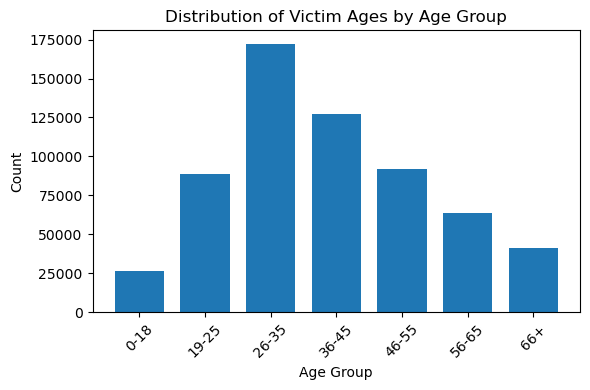

In [8]:
# Vict age comparison into 8 different groups
# Define the bins and labels
bins = [0, 18, 25, 35, 45, 55, 65, 100]  # You can adjust these bin boundaries as needed
labels = ["0-18", "19-25", "26-35", "36-45", "46-55", "56-65", "66+"]

# Use pd.cut() to create the age groups
cleanData["AgeGroup"] = pd.cut(cleanData["Vict Age"], bins=bins, labels=labels)

# Count the occurrences of each age group
age_group_counts = cleanData["AgeGroup"].value_counts().reindex(labels)

# Create a bar plot
plt.figure(figsize=(6, 4))
plt.bar(age_group_counts.index, age_group_counts, width=0.75)

# Set plot labels and title
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.title("Distribution of Victim Ages by Age Group")

# Rotate x-axis labels by 45 degrees for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

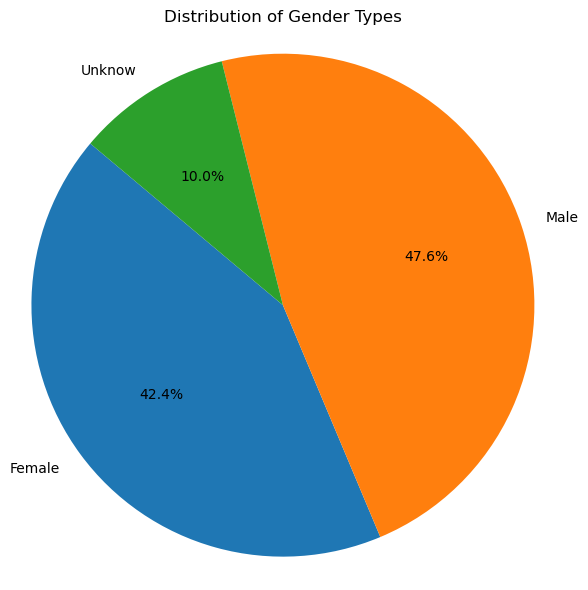

In [9]:
# Replace "H" and "M" to "Male"
cleanData["Vict Sex"] = cleanData["Vict Sex"].replace(["H", "M"], "Male")
cleanData["Vict Sex"] = cleanData["Vict Sex"].replace(["F"], "Female")
cleanData["Vict Sex"] = cleanData["Vict Sex"].replace(["X", "N/A"], "Unknow")

# Group the data by "Vict Sex"
grouped = cleanData.groupby("Vict Sex")

# Count the occurrences of each gender category
gender_counts = grouped.size()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct="%1.1f%%", startangle=140)

# Set plot title
plt.title("Distribution of Gender Types")

# Show the pie chart
plt.axis("equal")  # Equal aspect ratio ensures that the pie chart is circular.

plt.tight_layout()
plt.show()

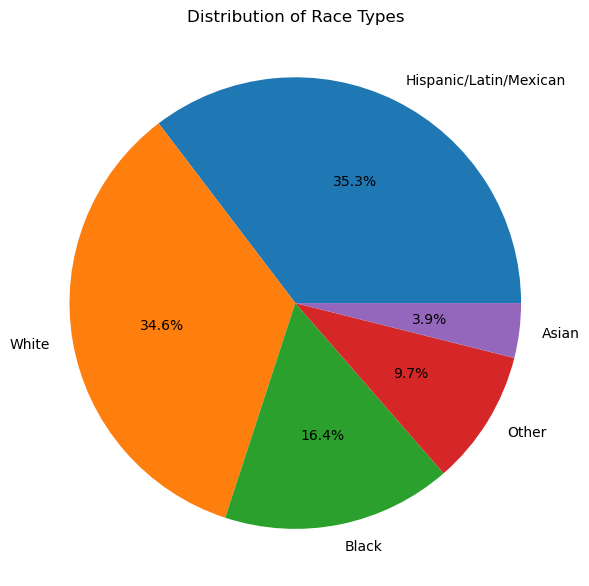

In [10]:
# Group "Vict Descent" into 5 groups 
cleanData["Vict Descent"] = cleanData["Vict Descent"].replace(["A", "C", "J", "K", "V", "Z"], "Asian")
cleanData["Vict Descent"] = cleanData["Vict Descent"].replace(["B"], "Black")
cleanData["Vict Descent"] = cleanData["Vict Descent"].replace(["H"], "Hispanic/Latin/Mexican")
cleanData["Vict Descent"] = cleanData["Vict Descent"].replace(["D", "F", "L", "O", "G", "P", "S", "U"], "Other")
cleanData["Vict Descent"] = cleanData["Vict Descent"].replace(["I", "W", "X"], "White")

# Group the data by "Vict Descent"
grouped = cleanData.groupby("Vict Descent")

# Count the occurrences of each Race category
race_counts = grouped.size()

# Sort the data by counts in ascending order
race_counts_sorted = race_counts.sort_values(ascending=False)

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(race_counts_sorted, labels=race_counts_sorted.index, autopct="%1.1f%%", startangle=0)

# Set plot title
plt.title("Distribution of Race Types")

# Show the pie chart
plt.axis("equal")  # Equal aspect ratio ensures that the pie chart is circular.

plt.tight_layout()
plt.show()

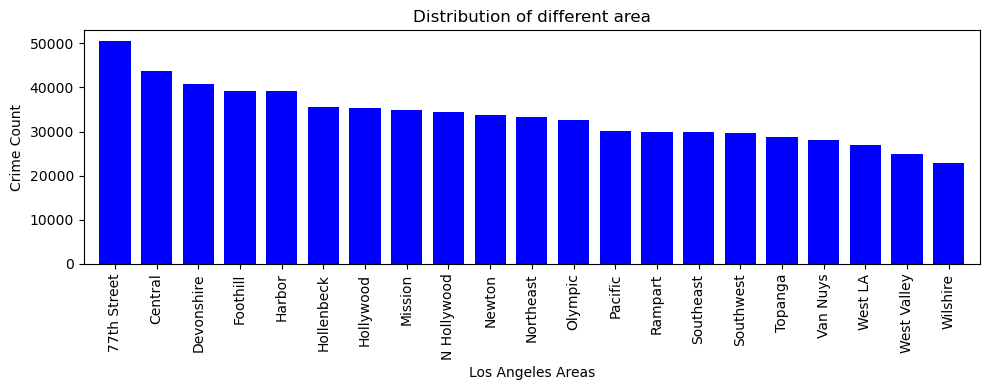

In [11]:
# Area Crime committed data analysis use "AREA NAME"
# Group the data by 'AREA NAME'
grouped = cleanData.groupby("AREA NAME")

# Count the occurrences of each area
area_counts = grouped.size()

# Sort the data by counts in ascending order
area_counts_sorted = area_counts.sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 4))
plt.bar(area_counts.index, area_counts_sorted, color="b", align="center", width=0.75)

# Set plot labels and title
plt.xlabel("Los Angeles Areas")
plt.ylabel("Crime Count")
plt.title("Distribution of different area")

# Rotate x-axis labels by 45 degrees for better readability
plt.xticks(rotation=90)
plt.xlim(-0.75, len(area_counts)-0.25)

# Show the plot
plt.tight_layout()
plt.show()

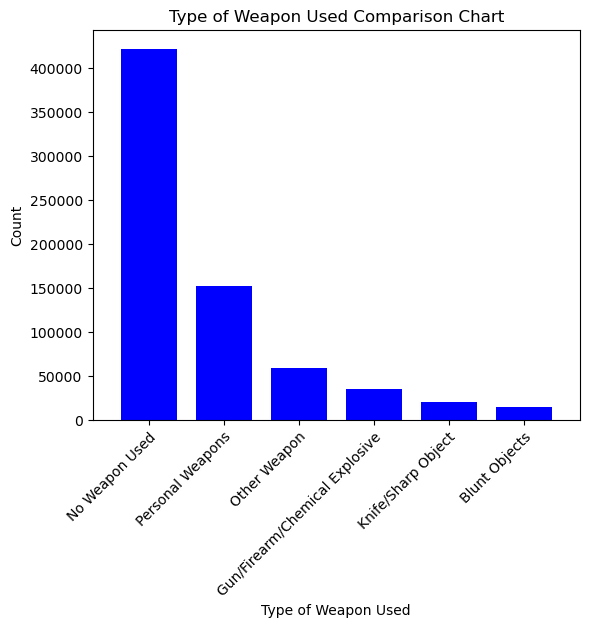

In [12]:
# Group "Weapon Desc" into 6 groups 
cleanData["Weapon Desc"] = cleanData["Weapon Desc"].replace(["ANTIQUE FIREARM", "AUTOMATIC WEAPON/SUB-MACHINE GUN",
                                                             "HAND GUN", "HECKLER & KOCH 91 SEMIAUTOMATIC ASSAULT RIFLE",
                                                             "HECKLER & KOCH 93 SEMIAUTOMATIC ASSAULT RIFLE", 
                                                             "M-14 SEMIAUTOMATIC ASSAULT RIFLE",
                                                             "M1-1 SEMIAUTOMATIC ASSAULT RIFLE",
                                                             "MAC-10 SEMIAUTOMATIC ASSAULT WEAPON",
                                                             "MAC-11 SEMIAUTOMATIC ASSAULT WEAPON", "RELIC FIREARM",
                                                             "REVOLVER", "RIFLE", "SAWED OFF RIFLE/SHOTGUN",
                                                             "SEMI-AUTOMATIC PISTOL", "SEMI-AUTOMATIC RIFLE", "SHOTGUN", 
                                                             "UNK TYPE SEMIAUTOMATIC ASSAULT RIFLE",
                                                             "UNKNOWN FIREARM", "AIR PISTOL/REVOLVER/RIFLE/BB GUN", 
                                                             "ASSAULT WEAPON/UZI/AK47/ETC", "OTHER FIREARM", 
                                                             "UZI SEMIAUTOMATIC ASSAULT RIFLE", "BOMB THREAT",
                                                             "CAUSTIC CHEMICAL/POISON", "EXPLOXIVE DEVICE", "FIRE", 
                                                             "LIQUOR/DRUGS", "SCALDING LIQUID", "SYRINGE"], 
                                                            "Gun/Firearm/Chemical Explosive")

cleanData["Weapon Desc"] = cleanData["Weapon Desc"].replace(["BOWIE KNIFE", "CLEAVER", "DIRK DAGGER", "FOLDING KNIFE",
                                                             "KITCHEN KNIFE", "KNIFE WITH BLADE 6INCHES OR LESS",
                                                             "KNIFE WITH BLADE OVER 6 INCHES IN LENGTH", "RAZOR",
                                                             "STRAIGHT RAZOR", "SWORD", "UNKNOWN TYPE CUTTING INSTRUMENT",
                                                             "MACHETE", "ICE PICK", "OTHER CUTTING INSTRUMENT",
                                                             "OTHER KNIFE", "DIRK/DAGGER", "RAZOR BLADE", "SCISSORS", 
                                                             "SCREWDRIVER", "SWITCH BLADE", "BOW AND ARROW"],
                                                            "Knife/Sharp Object")

cleanData["Weapon Desc"] = cleanData["Weapon Desc"].replace(["AXE", "BELT FLAILING INSTRUMENT CHAIN", "BLACKJACK",
                                                             "BLUNT INSTRUMENT", "BOARD", "BRASS KNUCKLES", "CLUB/BAT",
                                                             "CONCRETE BLOCK/BRICK", "GLASS", "HAMMER", "PIPE METAL PIPE",
                                                             "ROCK/THROWN OBJECT", "STICK", "UNKNOWN WEAPON OTHER WEAPON", 
                                                             "FIXED OBJECT", "BOTTLE", "PIPE/METAL PIPE", ""], 
                                                            "Blunt Objects")
  
cleanData["Weapon Desc"] = cleanData["Weapon Desc"].replace(["MARTIAL ARTS WEAPONS", "PHYSICAL PRESENCE", 
                                                             "STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)"],
                                                            "Personal Weapons")
    
cleanData["Weapon Desc"] = cleanData["Weapon Desc"].replace(["VEHICLE", "AIR PISTOL REVOLVER RIFLE BB GUN", "STARTER PISTOL/REVOLVER", 
                                                             "TOY GUN", "UNKNOWN TYPE SEMIAUTOMATIC ASSAULT RIFLE", 
                                                             "SIMULATED GUN", "TIRE IRON", "BELT FLAILING INSTRUMENT/CHAIN", "ROPE/LIGATURE", 
                                                             "UNKNOWN WEAPON/OTHER WEAPON", "MACE/PEPPER SPRAY", "STUN GUN",
                                                             "DOG/ANIMAL (SIC ANIMAL ON)", "VERBAL THREAT", "DEMAND NOTE"], 
                                                            "Other Weapon")

cleanData["Weapon Desc"] = cleanData["Weapon Desc"].replace(["N/A"], "No Weapon Used")

# Group the data by "Weapon Desc"
groupe = cleanData.groupby("Weapon Desc")

# Count the occurrences of each weapon type used
weapon_count = groupe.size()

# Sort the data by counts in ascending order
weapon_count_sorted = weapon_count.sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(6, 6))
plt.bar(weapon_count_sorted.index, weapon_count_sorted, color="b", align="center", width=0.75)

# Set plot labels and title
plt.xlabel("Type of Weapon Used")
plt.ylabel("Count")
plt.title("Type of Weapon Used Comparison Chart")

# Rotate x-axis labels by 45 degrees for better readability
plt.xticks(rotation=45, rotation_mode="anchor", ha="right", wrap=True)
plt.xlim(-0.75, len(weapon_count)-0.25)

# Show the plot
plt.tight_layout()
plt.show()

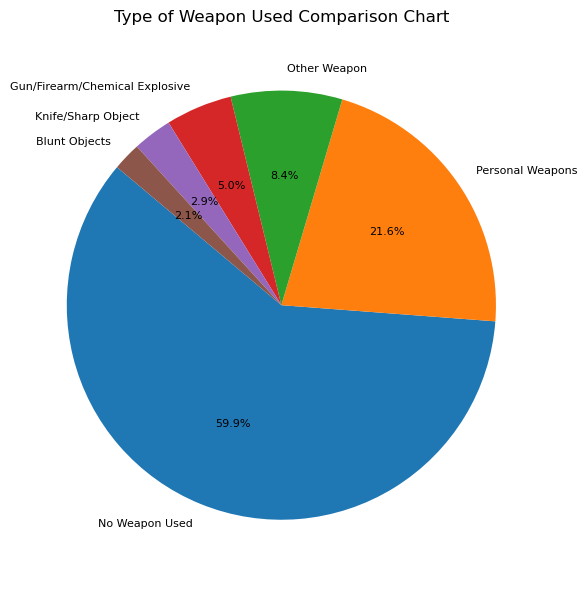

In [13]:
# Create a pie chart
plt.figure(figsize=(6, 6))

# Adjust the labeldistance to move the labels outward
labeldistance = 1.1  # You can adjust this value to control the label distance

# Set the font size for the labels (textprops argument)
label_font = {"fontsize": 8}  # You can adjust the fontsize as needed

plt.pie(weapon_count_sorted, labels=weapon_count_sorted.index, autopct="%1.1f%%", startangle=140, labeldistance=labeldistance, textprops=label_font)

# Set plot title
plt.title("Type of Weapon Used Comparison Chart")

# Show the pie chart
plt.axis("equal")  # Equal aspect ratio ensures that the pie chart is circular.

plt.tight_layout()
plt.show()

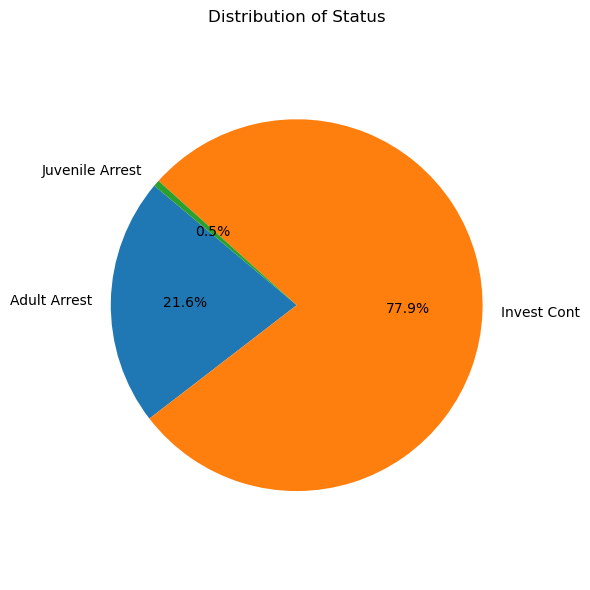

In [14]:
# Group
cleanData["Status Desc"] = cleanData["Status Desc"].replace(["Juv Arrest", "Juv Other"], "Juvenile Arrest")
cleanData["Status Desc"] = cleanData["Status Desc"].replace(["Adult Arrest", "Adult Other"], "Adult Arrest")
cleanData["Status Desc"] = cleanData["Status Desc"].replace(["UNK", "Invest Cont"], "Invest Cont")

# Group the data by 'Status Desc'
grouped = cleanData.groupby("Status Desc")

# Count the occurrences of current status
status_counts = grouped.size()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(status_counts, labels=status_counts.index, autopct="%1.1f%%", startangle=140)

# Set plot title
plt.title("Distribution of Status")

# Show the pie chart
plt.axis("equal")  # Equal aspect ratio ensures that the pie chart is circular.

plt.tight_layout()
plt.show()

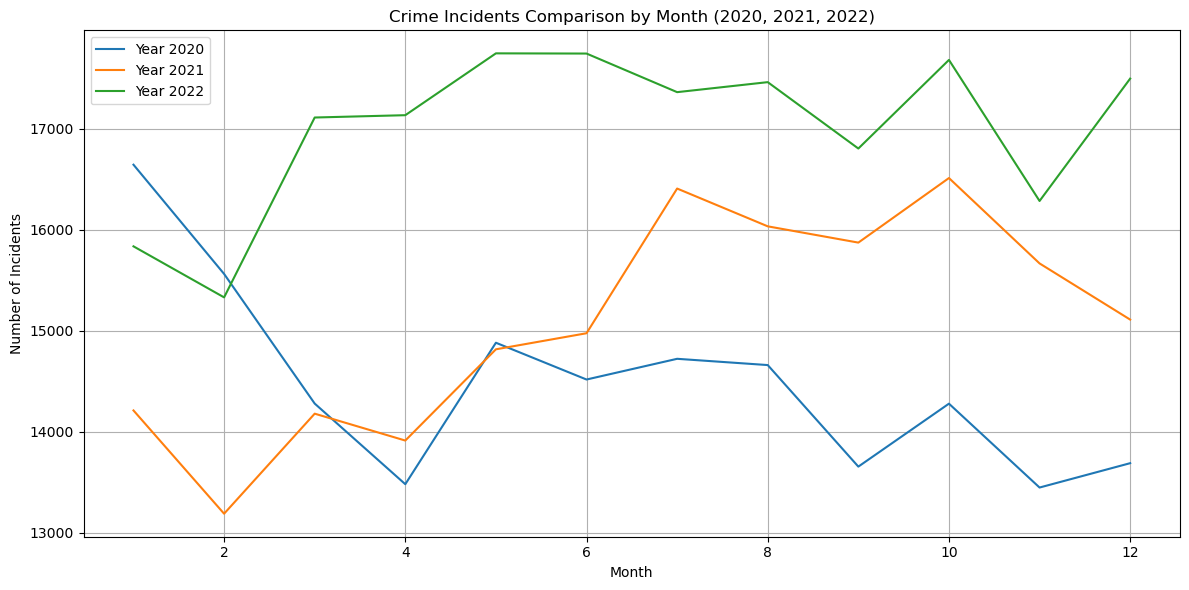

In [15]:
# Make sure you have the "DATE OCC" column as a datetime object
cleanData["DATE OCC"] = pd.to_datetime(cleanData["DATE OCC"], format="%m/%d/%Y %I:%M:%S %p")

# Extract year and month from the "DATE OCC" column
cleanData["Year"] = cleanData["DATE OCC"].dt.year
cleanData["Month"] = cleanData["DATE OCC"].dt.month

# Filter data for the years 2020, 2021, and 2022
years_to_compare = [2020, 2021, 2022]
filtered_data = cleanData[cleanData["Year"].isin(years_to_compare)]

# Group the data by year and month and count the number of occurrences
monthly_counts = filtered_data.groupby(["Year", "Month"]).size().unstack().fillna(0)

# Create a line chart to compare data by month
plt.figure(figsize=(12, 6))
for year in years_to_compare:
    plt.plot(monthly_counts.loc[year], label=f"Year {year}")

# Set chart labels and title
plt.xlabel("Month")
plt.ylabel("Number of Incidents")
plt.title("Crime Incidents Comparison by Month (2020, 2021, 2022)")

# Add a legend to distinguish the years
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

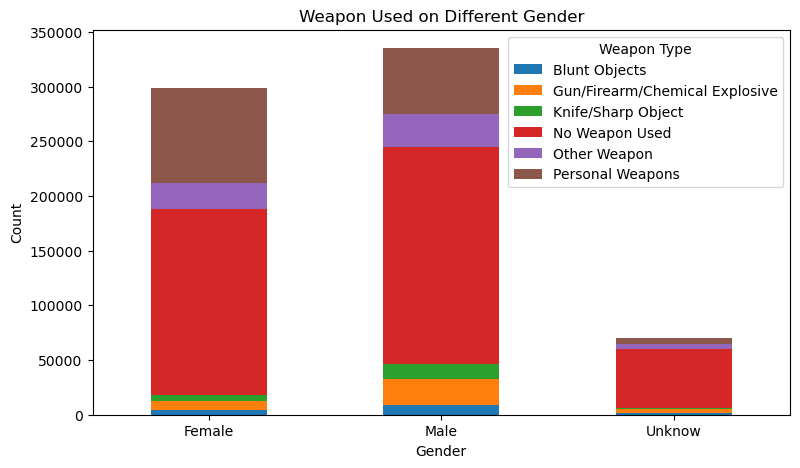

In [16]:
# Graphs Gender vs Weapons Used (Vivian)
# Group the data by "Vict Sex" and "Weapon Used"
grouped = cleanData.groupby(["Vict Sex", "Weapon Desc"])

# Count the occurrences of each combination of gender and weapon
gender_weapon_counts = grouped.size().unstack().fillna(0)

# Create a grouped bar chart
ax = gender_weapon_counts.plot(kind="bar", stacked=True, figsize=(9, 5))

# Set plot title and labels
plt.title("Weapon Used on Different Gender")
plt.xlabel("Gender")
plt.ylabel("Count")

# Customize the legend
ax.legend(title="Weapon Type", title_fontsize="10")

plt.xticks(rotation=0)  # Keep x-axis labels horizontal

plt.show()

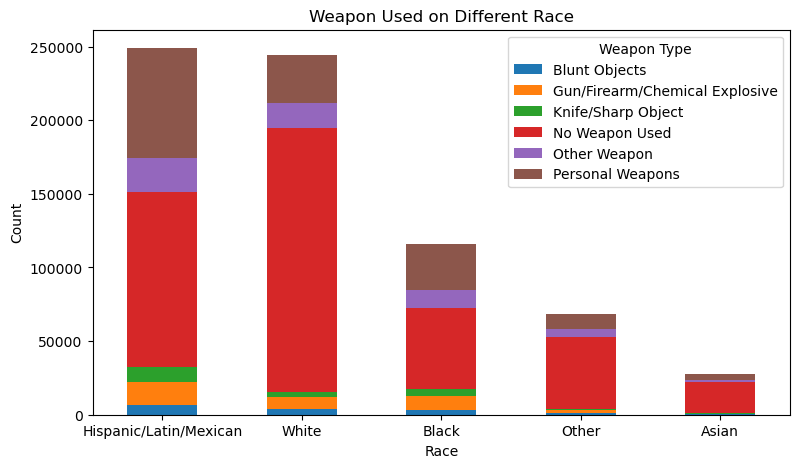

In [17]:
# Graphs Races vs Weapons Used (Vivian)
# Group the data by "Vict Descent" and "Weapon Used"
grouped = cleanData.groupby(["Vict Descent", "Weapon Desc"])

# Count the occurrences of each combination of race and weapon
race_weapon_counts = grouped.size().unstack().fillna(0)

# Calculate the total count of weapons used for each race and sort the data
race_weapon_counts["Total"] = race_weapon_counts.sum(axis=1)
race_weapon_counts = race_weapon_counts.sort_values(by="Total", ascending=False)

# Remove the "Total" column to avoid plotting it
race_weapon_counts = race_weapon_counts.drop("Total", axis=1)

# Create a grouped bar chart
ax = race_weapon_counts.plot(kind="bar", stacked=True, figsize=(9, 5))

# Set plot title and labels
plt.title("Weapon Used on Different Race")
plt.xlabel("Race")
plt.ylabel("Count")

# Customize the legend
ax.legend(title="Weapon Type", title_fontsize="10")

plt.xticks(rotation=0)  # Keep x-axis labels horizontal

plt.show()

In [18]:
# Filter the data by "Weapon Desc" and only keep the specified value
Firearm_df = cleanData[cleanData["Crm Cd Desc"] == "RAPE, FORCIBLE"].copy()

# Configure the map plot
Firearm_map = Firearm_df.hvplot.points(
    "LON",
    "LAT",
    geo=True,
    tiles="OSM",
    frame_width=600,
    frame_height=500,
    size="Crm Cd",
    scale = 0.3,
    color="AREA NAME",
    hover_cols=["AREA NAME", "Crm Cd Desc"]
)

Firearm_map

/Users/athanasioschryssis/anaconda3/lib/python3.11/site-packages/geoviews/operation/__init__.py:14: HoloviewsDeprecationWarning: 'ResamplingOperation' is deprecated and will be removed in version 1.18, use 'ResampleOperation2D' instead.
  from holoviews.operation.datashader import (
/Users/athanasioschryssis/anaconda3/lib/python3.11/site-packages/holoviews/core/util.py:1175: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  return pd.unique(values)
/Users/athanasioschryssis/anaconda3/lib/python3.11/site-packages/holoviews/core/util.py:1175: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  return pd.unique(values)
/Users/athanasioschryssis/anaconda3/lib/python3.11/site-packages/holoviews/core/util.py:1175: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArra

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [LON,LAT]   (AREA NAME,Crm Cd,Crm Cd Desc)

In [19]:
# Filter the data by "Weapon Desc" and only keep the specified value
Firearm_df = LACrime[LACrime["Crm Cd Desc"] == "HUMAN TRAFFICKING - COMMERCIAL SEX ACTS"].copy()

# Configure the map plot
Firearm_map = Firearm_df.hvplot.points(
    "LON",
    "LAT",
    geo=True,
    tiles="OSM",
    frame_width=600,
    frame_height=500,
    size="Crm Cd",
    scale = 0.3,
    color="AREA NAME",
    hover_cols=["AREA NAME", "Crm Cd Desc"]
)

Firearm_map

/Users/athanasioschryssis/anaconda3/lib/python3.11/site-packages/holoviews/core/util.py:1175: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  return pd.unique(values)
/Users/athanasioschryssis/anaconda3/lib/python3.11/site-packages/holoviews/core/util.py:1175: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  return pd.unique(values)
/Users/athanasioschryssis/anaconda3/lib/python3.11/site-packages/holoviews/core/util.py:1175: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  return pd.unique(values)
/Users/athanasioschryssis/anaconda3/lib/python3.11/site-packages/holoviews/core/util.py:1175: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarr

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [LON,LAT]   (AREA NAME,Crm Cd,Crm Cd Desc)

In [20]:
LACrime.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

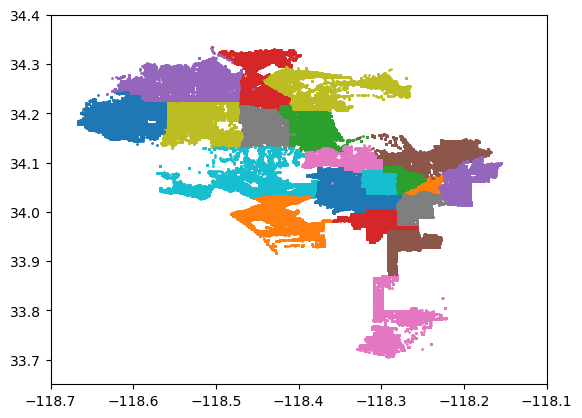

In [21]:
LACrime_clean_loc=LACrime.copy()
LACrime_clean_loc.drop(LACrime_clean_loc[(LACrime_clean_loc["LON"]==0) & (LACrime_clean_loc["LAT"]==0)].index,inplace=True)
LACrime_clean_loc[(LACrime_clean_loc["LON"]==0) & (LACrime_clean_loc["LAT"]==0)]["DR_NO"]
for z in LACrime_clean_loc["AREA NAME"].unique():
    plt.scatter(LACrime_clean_loc[LACrime_clean_loc["AREA NAME"]==z]["LON"],LACrime_clean_loc[LACrime_clean_loc["AREA NAME"]==z]["LAT"],s=1)
    
plt.xlim(-118.7, -118.1)
plt.ylim(33.65, 34.4)
plt.show()

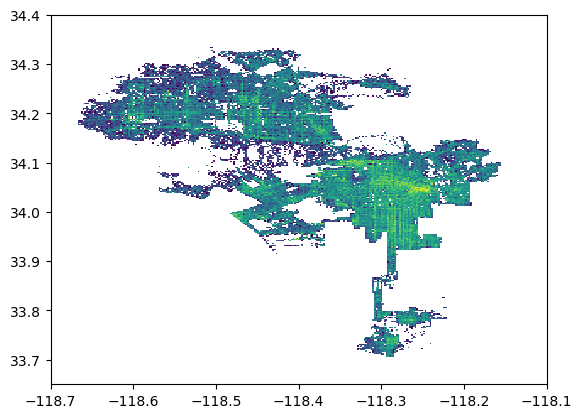

In [22]:
from matplotlib import colors
LACrime_clean_loc=LACrime.copy()
LACrime_clean_loc.drop(LACrime_clean_loc[(LACrime_clean_loc["LON"]==0) & (LACrime_clean_loc["LAT"]==0)].index,inplace=True)
LACrime_clean_loc[(LACrime_clean_loc["LON"]==0) & (LACrime_clean_loc["LAT"]==0)]["DR_NO"]
plt.hist2d(LACrime_clean_loc["LON"],LACrime_clean_loc["LAT"],bins=250,norm = colors.LogNorm())
plt.xlim(-118.7, -118.1)
plt.ylim(33.65, 34.4)
plt.show()

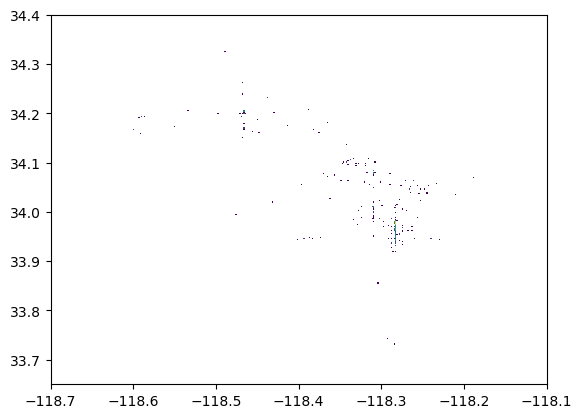

In [23]:
from matplotlib import colors
LACrime_clean_loc=LACrime.copy()
LACrime_clean_loc.drop(LACrime_clean_loc[(LACrime_clean_loc["LON"]==0) & (LACrime_clean_loc["LAT"]==0)].index,inplace=True)
LACrime_clean_loc[(LACrime_clean_loc["LON"]==0) & (LACrime_clean_loc["LAT"]==0)]["DR_NO"]
df = LACrime_clean_loc[LACrime_clean_loc["Crm Cd Desc"].str.contains("HUMAN")]
for z in df["Crm Cd Desc"].unique():
    plt.hist2d(df["LON"],df["LAT"],bins=250,norm = colors.LogNorm())
    
plt.xlim(-118.7, -118.1)
plt.ylim(33.65, 34.4)
plt.show()

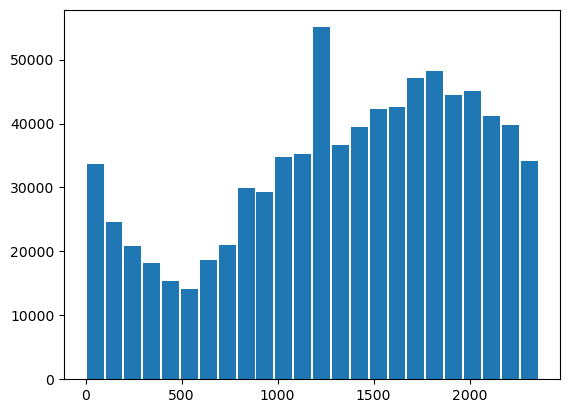

In [24]:
LACrime_clean_loc=LACrime.copy()
plt.hist(LACrime_clean_loc["TIME OCC"],bins=24,rwidth=.9)
plt.show()

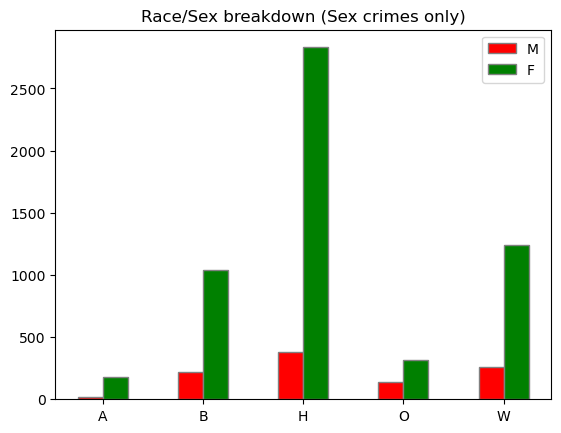

In [25]:
barWidth=0.25
df=LACrime_clean_loc[(LACrime_clean_loc["Vict Sex"]=="M")|
                     (LACrime_clean_loc["Vict Sex"]=="F")]
df=df.loc[(LACrime_clean_loc["Vict Descent"]=="A")|
                         (LACrime_clean_loc["Vict Descent"]=="B")|
                         (LACrime_clean_loc["Vict Descent"]=="H")|
                         (LACrime_clean_loc["Vict Descent"]=="O")|
                         (LACrime_clean_loc["Vict Descent"]=="W"), ["Vict Descent", "Vict Sex", "Crm Cd Desc"]]

df = df[df["Crm Cd Desc"].str.contains("SEX")]
x = df.groupby("Vict Descent").count().index.tolist()
y_male = df.groupby(["Vict Descent", "Vict Sex"]).count().reset_index()
y_female=y_male.drop(y_male[y_male["Vict Sex"]=="M"].index)["Crm Cd Desc"].tolist()
y_male.drop(y_male[y_male["Vict Sex"]=="F"].index, inplace=True)

plt.bar(np.arange(len(x))-.125 , y_male["Crm Cd Desc"].tolist(), color ='r', width = barWidth, edgecolor ='grey', label ='M') 
plt.bar(np.arange(len(x))+.125, y_female, color ='g', width = barWidth, edgecolor ='grey', label ='F') 
plt.xticks(np.arange(len(x)),x)
plt.legend()
plt.title("Race/Sex breakdown (Sex crimes only)")
plt.show()

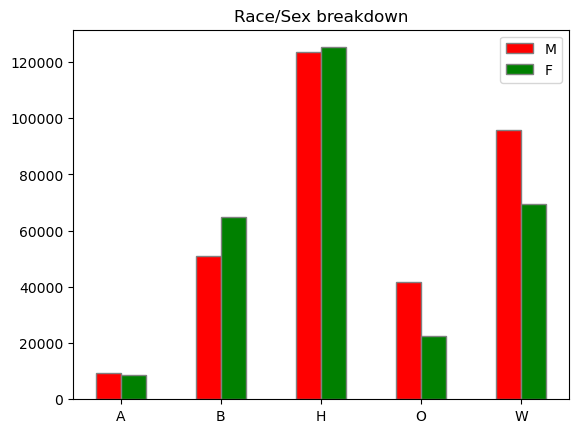

In [26]:
df=LACrime_clean_loc[(LACrime_clean_loc["Vict Sex"]=="M")|
                     (LACrime_clean_loc["Vict Sex"]=="F")]
df=df.loc[(LACrime_clean_loc["Vict Descent"]=="A")|
                         (LACrime_clean_loc["Vict Descent"]=="B")|
                         (LACrime_clean_loc["Vict Descent"]=="H")|
                         (LACrime_clean_loc["Vict Descent"]=="O")|
                         (LACrime_clean_loc["Vict Descent"]=="W"), ["Vict Descent", "Vict Sex", "DR_NO"]]

x = df.groupby("Vict Descent").count().index.tolist()
y_male = df.groupby(["Vict Descent", "Vict Sex"]).count().reset_index()
y_female=y_male.drop(y_male[y_male["Vict Sex"]=="M"].index)["DR_NO"].tolist()
y_male.drop(y_male[y_male["Vict Sex"]=="F"].index, inplace=True)

plt.bar(np.arange(len(x))-.125 , y_male["DR_NO"].tolist(), color ='r', width = barWidth, edgecolor ='grey', label ='M') 
plt.bar(np.arange(len(x))+.125, y_female, color ='g', width = barWidth, edgecolor ='grey', label ='F') 
plt.xticks(np.arange(len(x)),x)
plt.legend()
plt.title("Race/Sex breakdown")
plt.show()

/var/folders/vf/vmk7hfw95j1f6p8wn00dpk3m0000gn/T/ipykernel_29841/1976789591.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Age Range"]=pd.cut(df["Vict Age"], bins, labels=labels)
/var/folders/vf/vmk7hfw95j1f6p8wn00dpk3m0000gn/T/ipykernel_29841/1976789591.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  x = df.groupby("Age Range").count().index.tolist()
/var/folders/vf/vmk7hfw95j1f6p8wn00dpk3m0000gn/T/ipykernel_29841/1976789591.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pa

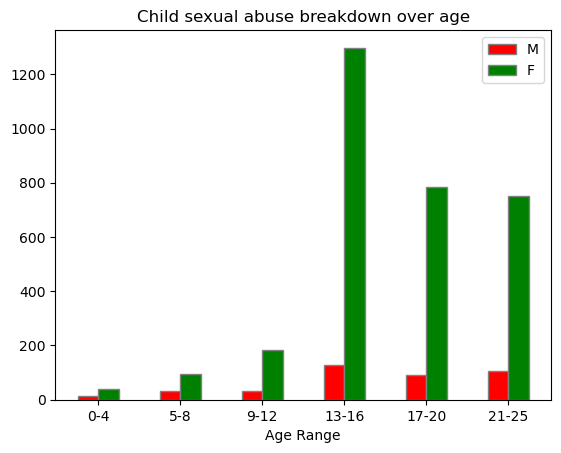

In [27]:
barWidth = .25
df=LACrime_clean_loc[(LACrime_clean_loc["Vict Sex"]=="M")|
                     (LACrime_clean_loc["Vict Sex"]=="F")]
# df=df.loc[(LACrime_clean_loc["Vict Descent"]=="A")|
#                          (LACrime_clean_loc["Vict Descent"]=="B")|
#                          (LACrime_clean_loc["Vict Descent"]=="H")|
#                          (LACrime_clean_loc["Vict Descent"]=="O")|
#                          (LACrime_clean_loc["Vict Descent"]=="W"), ["Vict Descent", "Vict Sex", "Crm Cd Desc","Vict Age"]]
# df
bins = [0,4.5, 8.5, 12.5, 16.5, 20.5, 25]
labels = ["0-4","5-8","9-12", "13-16", "17-20", "21-25"]
df["Age Range"]=pd.cut(df["Vict Age"], bins, labels=labels)

# df = df[df["Crm Cd Desc"].str.contains("CHILD" and "SEX")]
df = df[df["Crm Cd Desc"].str.contains("SEX")]
# df = df[not(df["Crm Cd Desc"].str.contains("SEX"))]
df
x = df.groupby("Age Range").count().index.tolist()
y_male = df.groupby(["Age Range", "Vict Sex"]).count().reset_index()
y_female=y_male.drop(y_male[y_male["Vict Sex"]=="M"].index)["Crm Cd Desc"].tolist()
y_male.drop(y_male[y_male["Vict Sex"]=="F"].index, inplace=True)

plt.bar(np.arange(len(x))-.125 , y_male["Crm Cd Desc"].tolist(), color ='r', width = barWidth, edgecolor ='grey', label ='M') 
plt.bar(np.arange(len(x))+.125, y_female, color ='g', width = barWidth, edgecolor ='grey', label ='F') 
plt.xticks(np.arange(len(x)),x)
plt.legend()
plt.title("Child sexual abuse breakdown over age")
plt.xlabel("Age Range")
plt.show()

/var/folders/vf/vmk7hfw95j1f6p8wn00dpk3m0000gn/T/ipykernel_29841/2798716541.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  x = df.groupby("Age Range").count().index.tolist()
/var/folders/vf/vmk7hfw95j1f6p8wn00dpk3m0000gn/T/ipykernel_29841/2798716541.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  y_A = df.groupby(["Age Range", "Vict Descent"]).count().reset_index()


Text(0.5, 0, 'Age Range')

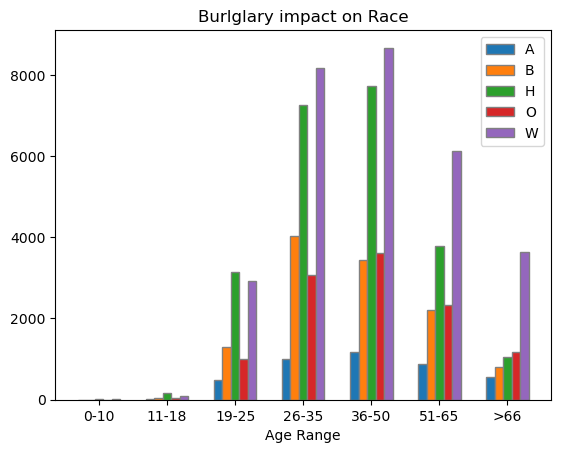

In [28]:
barWidth = .125
df=LACrime_clean_loc[(LACrime_clean_loc["Vict Sex"]=="M")|
                     (LACrime_clean_loc["Vict Sex"]=="F")]
df=LACrime_clean_loc.loc[(LACrime_clean_loc["Vict Descent"]=="A")|
                         (LACrime_clean_loc["Vict Descent"]=="B")|
                         (LACrime_clean_loc["Vict Descent"]=="H")|
                         (LACrime_clean_loc["Vict Descent"]=="O")|
                         (LACrime_clean_loc["Vict Descent"]=="W"), ["Vict Descent", "Vict Sex", "Crm Cd Desc","Vict Age"]]



df
bins = [0,10.5, 18.5, 25.5, 35.5, 50.5, 65.5, 100]
labels = ["0-10","11-18","19-25", "26-35", "36-50", "51-65", ">66"]
df["Age Range"]=pd.cut(df["Vict Age"], bins, labels=labels)

df = df[df["Crm Cd Desc"].str.contains("BURGLARY")]
df
x = df.groupby("Age Range").count().index.tolist()
y_A = df.groupby(["Age Range", "Vict Descent"]).count().reset_index()
y_B=y_A.drop(y_A[y_A["Vict Descent"]!="B"].index)["Crm Cd Desc"].tolist()
y_H=y_A.drop(y_A[y_A["Vict Descent"]!="H"].index)["Crm Cd Desc"].tolist()
y_O=y_A.drop(y_A[y_A["Vict Descent"]!="O"].index)["Crm Cd Desc"].tolist()
y_W=y_A.drop(y_A[y_A["Vict Descent"]!="W"].index)["Crm Cd Desc"].tolist()
y_A.drop(y_A[y_A["Vict Descent"]!="A"].index, inplace=True)
df
plt.bar(np.arange(len(x))-(2*barWidth) , y_A["Crm Cd Desc"].tolist(),  width = barWidth, edgecolor ='grey', label ='A') 
plt.bar(np.arange(len(x))-(1*barWidth), y_B,  width = barWidth, edgecolor ='grey', label ='B') 
plt.bar(np.arange(len(x))+(0*barWidth), y_H,  width = barWidth, edgecolor ='grey', label ='H') 
plt.bar(np.arange(len(x))+(1*barWidth), y_O, width = barWidth, edgecolor ='grey', label ='O') 
plt.bar(np.arange(len(x))+(2*barWidth), y_W,  width = barWidth, edgecolor ='grey', label ='W') 
# # y_B
# # plt.bar(np.arange(len(x))+.125, y_H, color ='g', width = barWidth, edgecolor ='grey', label ='F') 
# # plt.bar(np.arange(len(x))+.125, y_O, color ='g', width = barWidth, edgecolor ='grey', label ='F') 
# # plt.bar(np.arange(len(x))+.125, y_W, color ='g', width = barWidth, edgecolor ='grey', label ='F') 

plt.xticks(np.arange(len(x)),x)
plt.legend()
plt.title("Burlglary impact on Race")
plt.xlabel("Age Range")
# plt.show()

Code from Steven Joseph Islava

In [29]:
def explore_bureau(val):
    if val in [1, 12, 14, 3, 6, 18, 20]:
        return "Valley"
    elif val in [15, 2, 11, 9, 21]:
        return "Central"
    elif val in [8, 10, 5, 4, 16]:
        return "West"
    elif val in [13, 3, 17, 19]:
        return "South"
    else:
        return "Other"

dropped_LAcrime_df["Bureau"] = dropped_LAcrime_df["AREA"].transform(explore_bureau)

In [30]:
def explore_bureau(val):
    if val in [1, 12, 14, 3, 6, 18, 20]:
        return "Valley"
    elif val in [15, 2, 11, 9, 21]:
        return "Central"
    elif val in [8, 10, 5, 4, 16]:
        return "West"
    elif val in [13, 3, 17, 19]:
        return "South"
    else:
        return "Other"

dropped_LAcrime_df["Bureau"] = dropped_LAcrime_df["AREA"].transform(explore_bureau)
dropped_LAcrime_df

,DR_NO,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,...,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,LOCATION,LAT,LON,Bureau
0,10304468,2020-01-08,2230,3,Southwest,377,624,BATTERY - SIMPLE ASSAULT,36,F,...,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,1100 W 39TH PL,34.0141,-118.2978,Valley
1,190101086,2020-01-01,330,1,Central,163,624,BATTERY - SIMPLE ASSAULT,25,M,...,102.0,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,700 S HILL ST,34.0459,-118.2545,Valley
2,200110444,2020-02-13,1200,1,Central,155,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,0,X,...,726.0,POLICE FACILITY,NaN,NaN,AA,Adult Arrest,200 E 6TH ST,34.0448,-118.2474,Valley
3,191501505,2020-01-01,1730,15,N Hollywood,1543,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,...,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,5400 CORTEEN PL,34.1685,-118.4019,Central
4,191921269,2020-01-01,415,19,Mission,1998,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,...,409.0,BEAUTY SUPPLY STORE,NaN,NaN,IC,Invest Cont,14400 TITUS ST,34.2198,-118.4468,South
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811658,231604807,2023-01-26,1800,16,Foothill,1663,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",23,M,...,122.0,"VEHICLE, PASSENGER/TRUCK",NaN,NaN,IC,Invest Cont,12500 BRANFORD ST,34.2466,-118.4054,West
811659,231606525,2023-03-22,1000,16,Foothill,1602,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",25,F,...,102.0,SIDEWALK,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,12800 FILMORE ST,34.2790,-118.4116,West
811660,231210064,2023-04-12,1630,12,77th Street,1239,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",29,M,...,222.0,LAUNDROMAT,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,6100 S VERMONT AV,33.9841,-118.2915,Valley
811661,230115220,2023-07-01,1,1,Central,154,352,PICKPOCKET,24,F,...,735.0,NIGHT CLUB (OPEN EVENINGS ONLY),NaN,NaN,IC,Invest Cont,500 S MAIN ST,34.0467,-118.2485,Valley


In [31]:
def explore_parent_category(val):
    if val in [442, 341,662, 350, 480, 351, 420, 440, 354, 510]:
        return "Theft"
    elif val in [310, 330, 210, 220, 940, 745, 740, 648]:
        return "Burglary"
    elif val in [1236, 626, 121, 860, 850, 956, 888]:
        return "Sexual"
    elif val in [ 930, 624, 761, 625, 230]:
        return "Assault"
    else:
        return "Other"

dropped_LAcrime_df["Parent Category"] = dropped_LAcrime_df["Crm Cd"].transform(explore_parent_category)
dropped_LAcrime_df

,DR_NO,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,...,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,LOCATION,LAT,LON,Bureau,Parent Category
0,10304468,2020-01-08,2230,3,Southwest,377,624,BATTERY - SIMPLE ASSAULT,36,F,...,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,1100 W 39TH PL,34.0141,-118.2978,Valley,Assault
1,190101086,2020-01-01,330,1,Central,163,624,BATTERY - SIMPLE ASSAULT,25,M,...,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,700 S HILL ST,34.0459,-118.2545,Valley,Assault
2,200110444,2020-02-13,1200,1,Central,155,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,0,X,...,POLICE FACILITY,NaN,NaN,AA,Adult Arrest,200 E 6TH ST,34.0448,-118.2474,Valley,Other
3,191501505,2020-01-01,1730,15,N Hollywood,1543,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,...,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,5400 CORTEEN PL,34.1685,-118.4019,Central,Burglary
4,191921269,2020-01-01,415,19,Mission,1998,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,...,BEAUTY SUPPLY STORE,NaN,NaN,IC,Invest Cont,14400 TITUS ST,34.2198,-118.4468,South,Burglary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811658,231604807,2023-01-26,1800,16,Foothill,1663,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",23,M,...,"VEHICLE, PASSENGER/TRUCK",NaN,NaN,IC,Invest Cont,12500 BRANFORD ST,34.2466,-118.4054,West,Burglary
811659,231606525,2023-03-22,1000,16,Foothill,1602,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",25,F,...,SIDEWALK,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,12800 FILMORE ST,34.2790,-118.4116,West,Assault
811660,231210064,2023-04-12,1630,12,77th Street,1239,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",29,M,...,LAUNDROMAT,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,6100 S VERMONT AV,33.9841,-118.2915,Valley,Assault
811661,230115220,2023-07-01,1,1,Central,154,352,PICKPOCKET,24,F,...,NIGHT CLUB (OPEN EVENINGS ONLY),NaN,NaN,IC,Invest Cont,500 S MAIN ST,34.0467,-118.2485,Valley,Other


In [32]:
# aggretate data for Bureau and Crime Incidences
print(dropped_LAcrime_df.groupby("Bureau")["Parent Category"].count())

Bureau
Central    180709
Other       38505
South      105866
Valley     324125
West       162458
Name: Parent Category, dtype: int64


['Central' 'Other' 'South' 'Valley' 'West'] [180709, 38505, 105866, 324125, 162458]


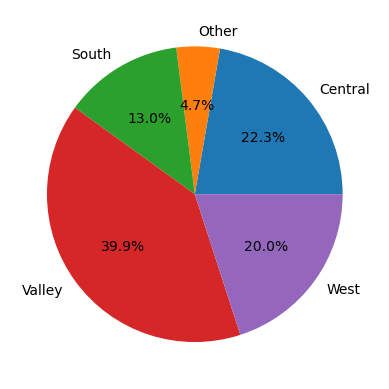

In [33]:
labels = dropped_LAcrime_df["Bureau"].unique()
labels.sort()
# The values of each section of the pie chart
sizes = list(dropped_LAcrime_df.groupby("Bureau")["Parent Category"].count())
print(labels, sizes)

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.show()

<h1>Crime Rates Based on Bureaus</h1>

In [34]:
print(dropped_LAcrime_df.groupby(["Bureau", "Parent Category"])["AREA"].count())

Bureau   Parent Category
Central  Assault             28924
         Burglary            46974
         Other               27256
         Sexual              15134
         Theft               62421
Other    Assault              5702
         Burglary            10723
         Other                5695
         Sexual               2699
         Theft               13686
South    Assault             18278
         Burglary            25227
         Other               16405
         Sexual               9165
         Theft               36791
Valley   Assault             64945
         Burglary            82935
         Other               46691
         Sexual              26580
         Theft              102974
West     Assault             26636
         Burglary            40698
         Other               25723
         Sexual              13229
         Theft               56172
Name: AREA, dtype: int64


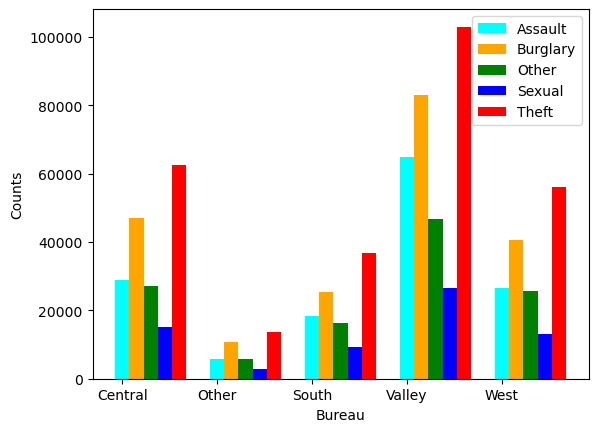

In [35]:
# Sample data (assuming you have a DataFrame like this)
data = {
    "Bureau": ["Central", "Central", "Central", "Central", "Central", "Other", "Other", "Other", "Other", "Other", "South", "South", "South", "South", "South", "Valley", "Valley", "Valley", "Valley", "Valley", "West", "West", "West", "West", "West"],
    "Parent Category": ["Assault", "Burglary", "Other", "Sexual", "Theft", "Assault", "Burglary", "Other", "Sexual", "Theft", "Assault", "Burglary", "Other", "Sexual", "Theft", "Assault", "Burglary", "Other", "Sexual", "Theft", "Assault", "Burglary", "Other", "Sexual", "Theft"],
    "AREA": [28924, 46974, 27256, 15134, 62421, 5702, 10723, 5695, 2699, 13686, 18278, 25227, 16405, 9165, 36791, 64945, 82935, 46691, 26580, 102974, 26636, 40698, 25723, 13229, 56172]
}

dropped_LAcrime_df = pd.DataFrame(data)

# Create a pivot table to organize data
pivot_table = dropped_LAcrime_df.pivot_table(index="Bureau", columns="Parent Category", values="AREA", fill_value=0)

# Extract bureaus and categories
bureaus = pivot_table.index
categories = pivot_table.columns

# Set the width of each bar
width = 0.15

# Create a list of positions for the bars
x = np.arange(len(bureaus))

# Define colors for each category
category_colors = {
    "Assault": "cyan",
    "Burglary": "orange",
    "Other": "green",
    "Sexual": "blue",
    "Theft": "red"
}

# Plot the data for each category
for i, category in enumerate(categories):
    plt.bar(x + i * width, pivot_table[category], width, label=category, color=category_colors[category])

# Set X-axis labels and legend
plt.xticks(x, bureaus)
plt.xlabel("Bureau")
plt.ylabel("Counts")
plt.legend()

plt.show()

<h1>Gender vs Area</h1>
We are trying to answer if one gender is a specific target in a an area. According to the bar graph, we can see that overall gender of the victim is not a significant factor except for in 77th Street where there are more female cases and in Central where males are mostly at risk.

In [36]:
LACrime_Leslie = LACrime [["LAT", "LON", "DATE OCC","TIME OCC","Crm Cd","AREA", "AREA NAME","Status","Vict Sex","Vict Age","Vict Descent","Weapon Used Cd","Weapon Desc","Crm Cd Desc"]].copy()


#Find the variables in columns
gender_variables = LACrime_Leslie["Vict Sex"].unique()

#Count how many females, males and unknowns there are in the DataFrame

#Fill in the Na/NaN values with zero in order to remove the rows from the DataFrame
LACrime_Leslie["Vict Sex"].fillna(0,inplace=True)

#Filters out the unnecessary variables like "nan", "H" & "-" in the "Vict Sex" column
def filter_rows_by_variable(df, col, values):
    return df[~df[col].isin(values)]

LACrime_gender=filter_rows_by_variable(LACrime_Leslie,"Vict Sex",[0,"H","-"])

#Create a list for the unique variables in the column "Vict Sex"
gender=[]
gender.append(LACrime_gender["Vict Sex"].unique())

In [37]:
female_num=(LACrime_gender["Vict Sex"].value_counts()["F"])
print(f"number of female cases: {female_num}")

male_num=(LACrime_gender["Vict Sex"].value_counts()["M"])
print(f"number of male cases: {male_num}")

unknown_num=(LACrime_gender["Vict Sex"].value_counts()["X"])
print(f"number of cases with unknown genders: {unknown_num}")

num_cases=(female_num+male_num+unknown_num)
print(f"total number of cases: {num_cases}")

number of female cases: 299086
number of male cases: 335428
number of cases with unknown genders: 70535
total number of cases: 705049


In [38]:
#Creating a for loop for the function in the list
for i in gender:
    cases_gender = LACrime_gender["Vict Sex"].value_counts()[i]
    print(f"Number of Cases for {(i)} Category: {cases_gender}")
    print(f'Total Number of Cases: {cases_gender.sum()}')

Number of Cases for ['F' 'M' 'X'] Category: Vict Sex
F    299086
M    335428
X     70535
Name: count, dtype: int64
Total Number of Cases: 705049


In [39]:
#Create a Dataframe to graph a pie plot
total_genders=pd.DataFrame({
    "Female":[female_num],
    "Male":[male_num],
    "Unknown": [unknown_num]
})

total_genders

,Female,Male,Unknown
0,299086,335428,70535


In [40]:
#Create a list for unique variables in the colymn "Vict Age"
age=[]
age.append(LACrime_gender["Vict Age"].unique())

print((age))
print("--------------------------------------------")

#Offers a list of attributes for the object
print(dir(age))
print("--------------------------------------------")

[array([36, 25,  0, 76, 31, 23, 29, 35, 41, 24, 34, 46, 66, 40, 27, 62, 43,
       71, 50, 19, 51, 33, 69, 39, 57, 78, 52, 38, 55, 44, 18, 54, 22, 28,
       42, 56, 67, 37, 60, 61, 59, 32, 30, 45, 20, 15, 58, 47, 48, 26, 21,
       64, 75, 12, 49, 68, 14, 13, 10, 53, 74, 65, 63,  8, 16, 72, 70,  9,
       90, 85, 81, 79, 94, 73, 11, 17, 80,  5, 82,  2, 77, 84, 88, 96, 99,
        7, 86, 92,  3, 83, 87,  6, -1, 89,  4, 93, 98, 91, 95, 97, -2, -3])]
--------------------------------------------
['__add__', '__class__', '__class_getitem__', '__contains__', '__delattr__', '__delitem__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__iadd__', '__imul__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__rmul__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', 'ap

Status
AREA NAME   Vict Sex        
77th Street F          22727
            M          16872
            X           4188
Central     F          17635
            M          27649
...                      ...
West Valley M          17453
            X            109
Wilshire    F          13501
            M          16486
            X           4473

[63 rows x 1 columns]

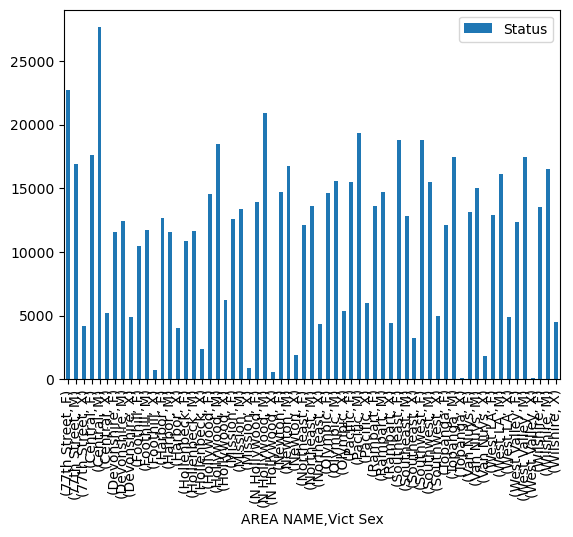

In [41]:
#plotting the bar graph based on this combined dataset results in one series that is hard to identifiy gender and locations
#Bar graph will not be used in presentation

LACrime_gender_area = LACrime_gender.groupby(["AREA NAME","Vict Sex"]).count()

del LACrime_gender_area["LAT"]
del LACrime_gender_area["LON"]
del LACrime_gender_area["DATE OCC"]
del LACrime_gender_area["TIME OCC"]
del LACrime_gender_area["Crm Cd"]
del LACrime_gender_area["Crm Cd Desc"]
del LACrime_gender_area["AREA"]
del LACrime_gender_area["Vict Age"]
del LACrime_gender_area["Vict Descent"]
del LACrime_gender_area["Weapon Used Cd"]
del LACrime_gender_area["Weapon Desc"]

LACrime_gender_area.plot.bar()

LACrime_gender_area

In [42]:
#Create Dataframe based for each gender so that each can be an individual series in bar plot
female_df = LACrime_gender[(LACrime_gender["Vict Sex"]=="F")]
del female_df["LAT"]
del female_df["LON"]
del female_df["DATE OCC"]
del female_df["TIME OCC"]
del female_df["Crm Cd"]
del female_df["AREA"]
del female_df["Vict Age"]
del female_df["Vict Descent"]
del female_df["Weapon Used Cd"]
del female_df["Weapon Desc"]

In [43]:
male_df = LACrime_gender[(LACrime_gender["Vict Sex"]=="M")]
del male_df["LAT"]
del male_df["LON"]
del male_df["DATE OCC"]
del male_df["TIME OCC"]
del male_df["Crm Cd"]
del male_df["AREA"]
del male_df["Vict Age"]
del male_df["Vict Descent"]
del male_df["Weapon Used Cd"]
del male_df["Weapon Desc"]

male_df.head()

,AREA NAME,Status,Vict Sex,Crm Cd Desc
1,Central,IC,M,BATTERY - SIMPLE ASSAULT
6,Central,IC,M,SHOPLIFTING - PETTY THEFT ($950 & UNDER)
8,Central,IC,M,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI..."
10,Central,IC,M,BURGLARY FROM VEHICLE
11,Central,IC,M,CRIMINAL THREATS - NO WEAPON DISPLAYED


In [44]:
unknown_df = LACrime_gender[(LACrime_gender["Vict Sex"]=="X")]
del unknown_df["LAT"]
del unknown_df["LON"]
del unknown_df["DATE OCC"]
del unknown_df["TIME OCC"]
del unknown_df["Crm Cd"]
del unknown_df["AREA"]
del unknown_df["Vict Age"]
del unknown_df["Vict Descent"]
del unknown_df["Weapon Used Cd"]
del unknown_df["Weapon Desc"]

unknown_df.head()

,AREA NAME,Status,Vict Sex,Crm Cd Desc
2,Central,AA,X,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE
4,Mission,IC,X,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA..."
7,Central,IC,X,OTHER MISCELLANEOUS CRIME
9,Devonshire,AO,X,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI..."
13,Central,IC,X,ARSON


In [45]:
#Shows the total number of cases based on Area Name for female
female_area = female_df.groupby(["AREA NAME","Vict Sex"]).count()
del female_area["Crm Cd Desc"]

female_area.pivot_table(index="Vict Sex",columns="AREA NAME")

Status                                                   \
AREA NAME 77th Street  Central Devonshire Foothill   Harbor Hollenbeck   
Vict Sex                                                                 
F             22727.0  17635.0    11587.0  10436.0  12634.0    10854.0   

                                                   ...                    \
AREA NAME Hollywood  Mission N Hollywood   Newton  ...  Olympic  Pacific   
Vict Sex                                           ...                     
F           14586.0  12622.0     13948.0  14701.0  ...  14599.0  15454.0   

                                                                               \
AREA NAME  Rampart Southeast Southwest  Topanga Van Nuys  West LA West Valley   
Vict Sex                                                                        
F          13582.0   18772.0   18762.0  12116.0  13140.0  12927.0     12356.0   

                    
AREA NAME Wilshire  
Vict Sex            
F          13501.0  

[1 rows x 21 columns]

In [46]:
#Shows the total number of cases based on Area Name for female
male_area = male_df.groupby(["AREA NAME","Vict Sex"]).count()
del male_area["Crm Cd Desc"]

male_area.pivot_table(index="Vict Sex",columns="AREA NAME")

Status                                                   \
AREA NAME 77th Street  Central Devonshire Foothill   Harbor Hollenbeck   
Vict Sex                                                                 
M             16872.0  27649.0    12443.0  11720.0  11592.0    11658.0   

                                                   ...                    \
AREA NAME Hollywood  Mission N Hollywood   Newton  ...  Olympic  Pacific   
Vict Sex                                           ...                     
M           18444.0  13384.0     20906.0  16748.0  ...  15573.0  19308.0   

                                                                               \
AREA NAME  Rampart Southeast Southwest  Topanga Van Nuys  West LA West Valley   
Vict Sex                                                                        
M          14743.0   12790.0   15525.0  17421.0  15051.0  16090.0     17453.0   

                    
AREA NAME Wilshire  
Vict Sex            
M          16486.0  

[1 rows x 21 columns]

In [47]:
#Shows the total number of cases based on Area Name for unknown sex
unknown_area = unknown_df.groupby(["AREA NAME","Vict Sex"]).count()
unknown_area.pivot_table(index="Vict Sex",columns="AREA NAME")

Crm Cd Desc                                                 \
AREA NAME 77th Street Central Devonshire Foothill  Harbor Hollenbeck   
Vict Sex                                                               
X              4188.0  5185.0     4864.0    732.0  3987.0     2376.0   

                                                 ...  Status                  \
AREA NAME Hollywood Mission N Hollywood  Newton  ... Olympic Pacific Rampart   
Vict Sex                                         ...                           
X            6231.0   903.0       547.0  1916.0  ...  5321.0  5993.0  4399.0   

                                                                             
AREA NAME Southeast Southwest Topanga Van Nuys West LA West Valley Wilshire  
Vict Sex                                                                     
X            3275.0    4927.0    96.0   1829.0  4867.0       109.0   4473.0  

[1 rows x 42 columns]

In [48]:
#Combine the transposed data in order to plot genders vs area name
gender_area_combined = pd.merge(pd.merge(male_area, unknown_area, on="AREA NAME"),female_area,on="AREA NAME")

#Reorderd the transposed Dataframe
gender_area_reorder = gender_area_combined[["Status","Status_x","Status_y"]]

#Rename the transposed Dataframe columns
gender_area_reorder.rename(columns={"Status_x":"Male",
                           "Status_y":"Unknown",
                           "Status":"Female"
                            })

,Female,Male,Unknown
AREA NAME,,,
77th Street,22727,16872,4188
Central,17635,27649,5185
Devonshire,11587,12443,4864
Foothill,10436,11720,732
Harbor,12634,11592,3987
Hollenbeck,10854,11658,2376
Hollywood,14586,18444,6231
Mission,12622,13384,903
N Hollywood,13948,20906,547


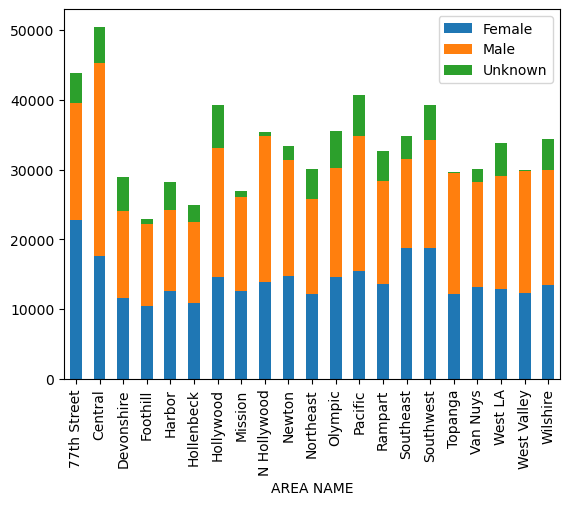

In [49]:
gender_area_reorder.plot.bar(stacked=True)
plt.legend(["Female","Male","Unknown"])

<h1>Analyzing Gender and Crime</h1>
Based on these graphs, you can see that males and females are about equally at risk of "Assult". When it comes to "Sexual Crimes" you can see that females are a greater target than males but males are greater targets for crimes associated with "Thief and "Vandalism".


In [50]:
LACrime_gender["Crm Cd Desc"] = LACrime_gender["Crm Cd Desc"].replace(['LETTERS, LEWD  -  TELEPHONE CALLS, LEWD' ,
                                                        'VIOLATION OF COURT ORDER', 'DISTURBING THE PEACE',
                                                        'TRESPASSING' , 
                                                        'VIOLATION OF RESTRAINING ORDER', 
                                                        'BOMB SCARE', 
                                                        'OTHER MISCELLANEOUS CRIME',
                                                        'VIOLATION OF TEMPORARY RESTRAINING ORDER' ,
                                                        'FAILURE TO YIELD' ,
                                                        'THREATENING PHONE CALLS/LETTERS' ,
                                                        'RESISTING ARREST',
                                                        'INCITING A RIOT', 
                                                        'BLOCKING DOOR INDUCTION CENTER' , 
                                                        'FAILURE TO DISPERSE', 
                                                        'STALKING',
                                                        'PROWLER',
                                                        'DISRUPT SCHOOL', 
                                                        'FALSE POLICE REPORT', 
                                                        'FIREARMS RESTRAINING ORDER (FIREARMS RO)', 
                                                        'ILLEGAL DUMPING' , 
                                                        'RECKLESS DRIVING',
                                                        'CONSPIRACY', 
                                                        'PANDERING', 
                                                        'FIREARMS EMERGENCY PROTECTIVE ORDER (FIREARMS EPO)', 
                                                        'REPLICA FIREARMS(SALE,DISPLAY,MANUFACTURE OR DISTRIBUTE)',
                                                       'CRIMINAL THREATS - NO WEAPON DISPLAYED',
                                                       'DRUNK ROLL',
                                                        'DRIVING WITHOUT OWNER CONSENT (DWOC)'],
                                                       "DISTURBING THE PEACE & HARASSMENT"

                                                      )

LACrime_gender["Crm Cd Desc"] = LACrime_gender["Crm Cd Desc"].replace(['KIDNAPPING', 
                                                        'KIDNAPPING - GRAND ATTEMPT' , 
                                                        'FALSE IMPRISONMENT'],
                                                       'KIDNAPPING'
                                                      )

LACrime_gender["Crm Cd Desc"] = LACrime_gender["Crm Cd Desc"].replace(['EXTORTION' ,
                                                        'DOCUMENT FORGERY / STOLEN FELONY' , 
                                                        'UNAUTHORIZED COMPUTER ACCESS',
                                                        'DOCUMENT WORTHLESS ($200 & UNDER)' , 
                                                        'DOCUMENT WORTHLESS ($200.01 & OVER)',
                                                        'COUNTERFEIT', 
                                                        'BRIBERY',
                                                        'CONTRIBUTING'], 
                                                       'FRAUD & FORGERY'
                                                      )

LACrime_gender["Crm Cd Desc"] = LACrime_gender["Crm Cd Desc"].replace(['BURGLARY',
                                                        'BURGLARY FROM VEHICLE', 
                                                        'BIKE - STOLEN' ,
                                                        'THEFT, PERSON',
                                                        'PURSE SNATCHING',
                                                        'BURGLARY, ATTEMPTED', 
                                                        'PICKPOCKET, ATTEMPT', 
                                                        'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD',
                                                        'SHOPLIFTING - PETTY THEFT ($950 & UNDER)', 
                                                        'THEFT PLAIN - PETTY ($950 & UNDER)',
                                                        'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)',
                                                        'DISHONEST EMPLOYEE - PETTY THEFT' , 
                                                        'THEFT, COIN MACHINE - PETTY ($950 & UNDER)',
                                                        'THEFT, COIN MACHINE - ATTEMPT', 'BIKE - ATTEMPTED STOLEN' ,
                                                        'PURSE SNATCHING - ATTEMPT' ,
                                                        'BUNCO, PETTY THEFT',
                                                        'PETTY THEFT - AUTO REPAIR', 
                                                        'TILL TAP - PETTY ($950 & UNDER)',
                                                        'VEHICLE - STOLEN' ,
                                                        'BUNCO, ATTEMPT',
                                                        'CREDIT CARDS, FRAUD USE ($950 & UNDER',
                                                        'BURGLARY FROM VEHICLE, ATTEMPTED' ,
                                                        'PICKPOCKET', 
                                                        'SHOPLIFTING - ATTEMPT', 
                                                        'DISHONEST EMPLOYEE ATTEMPTED THEFT',
                                                        'THEFT PLAIN - ATTEMPT' , 
                                                        'THEFT FROM PERSON - ATTEMPT',
                                                        'VEHICLE - ATTEMPT STOLEN'], 
                                                        'LOW END THIEF'
                                                      )

LACrime_gender["Crm Cd Desc"] = LACrime_gender["Crm Cd Desc"].replace(['THEFT FROM MOTOR VEHICLE - ATTEMPT', 
                                                        'THEFT OF IDENTITY' 'ROBBERY', 
                                                        'ATTEMPTED ROBBERY', 
                                                        'BUNCO, GRAND THEFT' ,
                                                        'THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)', 
                                                        'VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, BIKES, ETC)',
                                                        'GRAND THEFT / AUTO REPAIR',
                                                        'GRAND THEFT / INSURANCE FRAUD', 
                                                        'THEFT, COIN MACHINE - GRAND ($950.01 & OVER)', 
                                                        'TILL TAP - GRAND THEFT ($950.01 & OVER)',
                                                        'EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)', 
                                                        'CREDIT CARDS, FRAUD USE ($950.01 & OVER)', 
                                                        'DISHONEST EMPLOYEE - GRAND THEFT', 
                                                        'DEFRAUDING INNKEEPER/THEFT OF SERVICES, OVER $950.01', 
                                                        'EMBEZZLEMENT, PETTY THEFT ($950 & UNDER)', 
                                                        'DEFRAUDING INNKEEPER/THEFT OF SERVICES, $950 & UNDER' ,
                                                        'SHOPLIFTING-GRAND THEFT ($950.01 & OVER)'],
                                                      'HIGH END THIEF'
                                                      )

LACrime_gender["Crm Cd Desc"] = LACrime_gender["Crm Cd Desc"].replace(['CRIMINAL HOMICIDE',
                                                        'BRANDISH WEAPON', 
                                                        'DISCHARGE FIREARMS/SHOTS FIRED', 
                                                        'SHOTS FIRED AT INHABITED DWELLING' , 
                                                        'ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER', 
                                                        'WEAPONS POSSESSION/BOMBING'],
                                                      'ASSULT W/ WEAPON'
                                                      )

LACrime_gender["Crm Cd Desc"] = LACrime_gender["Crm Cd Desc"].replace(['BATTERY - SIMPLE ASSAULT' ,
                                                        'INTIMATE PARTNER - SIMPLE ASSAULT', 
                                                        'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT', 
                                                        'INTIMATE PARTNER - AGGRAVATED ASSAULT',
                                                        'THROWING OBJECT AT MOVING VEHICLE',
                                                        'OTHER ASSAULT','BATTERY POLICE (SIMPLE)',
                                                        'BATTERY ON A FIREFIGHTER', 
                                                        'LYNCHING - ATTEMPTED', 
                                                        'MANSLAUGHTER, NEGLIGENT', 
                                                        'CRUELTY TO ANIMALS', 
                                                        'LYNCHING'],
                                                      'ASSULT'
                                                      )

LACrime_gender["Crm Cd Desc"] = LACrime_gender["Crm Cd Desc"].replace(['VANDALISM - MISDEAMEANOR ($399 OR UNDER)', 
                                                        'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)',
                                                        'ARSON', 
                                                        'TELEPHONE PROPERTY - DAMAGE', 
                                                        'SHOTS FIRED AT MOVING VEHICLE, TRAIN OR AIRCRAFT'],
                                                      'VANDALISM'
                                                      )

LACrime_gender["Crm Cd Desc"] = LACrime_gender["Crm Cd Desc"].replace(['RAPE, FORCIBLE' ,
                                                        'BATTERY WITH SEXUAL CONTACT',
                                                        'SEXUAL PENETRATION W/FOREIGN OBJECT',
                                                        'SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ', 
                                                        'INCEST (SEXUAL ACTS BETWEEN BLOOD RELATIVES)', 
                                                        'BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSLT WITH ANIM',
                                                        'BIGAMY', 
                                                        'INDECENT EXPOSURE', 
                                                        'PEEPING TOM' , 
                                                        'HUMAN TRAFFICKING - COMMERCIAL SEX ACTS',
                                                        'CHILD PORNOGRAPHY', 
                                                        'SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH',
                                                        'HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE', 
                                                        'ORAL COPULATION' , 
                                                        'LEWD CONDUCT',
                                                        'RAPE, ATTEMPTED', 
                                                        'SEX OFFENDER REGISTRANT OUT OF COMPLIANCE', 
                                                        'PIMPING'],
                                                      'SEXUAL CRIMES')
                                                        
LACrime_gender["Crm Cd Desc"] = LACrime_gender["Crm Cd Desc"].replace(['CHILD STEALING', 
                                                        'CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)', 
                                                        'LEWD/LASCIVIOUS ACTS WITH CHILD', 
                                                        'CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT',
                                                        'DRUGS, TO A MINOR' , 
                                                        'CHILD ABANDONMENT', 
                                                        'CHILD NEGLECT (SEE 300 W.I.C.)',
                                                        'CONTEMPT OF COURT',
                                                        'CHILD ANNOYING (17YRS & UNDER)' , 
                                                        'CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT'],
                                                      'CRIMES AGAINST MINORS')

categorized_crimes = LACrime_gender["Crm Cd Desc"].unique()

/var/folders/vf/vmk7hfw95j1f6p8wn00dpk3m0000gn/T/ipykernel_29841/2673529281.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LACrime_gender["Crm Cd Desc"] = LACrime_gender["Crm Cd Desc"].replace(['LETTERS, LEWD  -  TELEPHONE CALLS, LEWD' ,
/var/folders/vf/vmk7hfw95j1f6p8wn00dpk3m0000gn/T/ipykernel_29841/2673529281.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LACrime_gender["Crm Cd Desc"] = LACrime_gender["Crm Cd Desc"].replace(['KIDNAPPING',
/var/folders/vf/vmk7hfw95j1f6p8wn00dpk3m0000gn/T/ipyker

In [51]:
crime_category = ['ASSULT', 
                  'SEXUAL CRIMES', 
                  'VANDALISM', 
                  'LOW END THIEF',
                  'DISTURBING THE PEACE & HARASSMENT', 
                  'THEFT OF IDENTITY',
                  'ROBBERY',
                  'ASSULT w/ WEAPON',
                  'HIGH END THIEF',
                  'FRAUD & FORGERY',
                  'CRIMES AGAINST MINORS',
                  'KIDNAPPING']

LACrime_gender_crime = LACrime_gender.groupby(["Crm Cd Desc","Vict Sex"]).count()

del LACrime_gender_crime["LAT"]
del LACrime_gender_crime["LON"]
del LACrime_gender_crime["DATE OCC"]
del LACrime_gender_crime["TIME OCC"]
del LACrime_gender_crime["Crm Cd"]
del LACrime_gender_crime["AREA"]
del LACrime_gender_crime["AREA NAME"]
del LACrime_gender_crime["Vict Age"]
del LACrime_gender_crime["Vict Descent"]
del LACrime_gender_crime["Weapon Used Cd"]
del LACrime_gender_crime["Weapon Desc"]
LACrime_gender_crime

Status
Crm Cd Desc                       Vict Sex        
ASSULT                            F          84675
                                  M          83138
                                  X           2553
ASSULT W/ WEAPON                  F           5210
                                  M          11512
                                  X           2117
CRIMES AGAINST MINORS             F           6315
                                  M           3478
                                  X             85
DISTURBING THE PEACE & HARASSMENT F          31847
                                  M          23574
                                  X           7838
FRAUD & FORGERY                   F           1667
                                  M           2903
                                  X            673
HIGH END THIEF                    F          15562
                                  M          25899
                                  X           5209
KIDNAPPING                        F            913
                                  M            278
                                  X             14
LOW END THIEF                     F          78222
                                  M         111775
                                  X          32615
ROBBERY                           F           6694
                                  M          16544
                                  X           4566
SEXUAL CRIMES                     F          11447
                                  M           1703
                                  X            625
THEFT OF IDENTITY                 F          29985
                                  M          20870
                                  X            633
VANDALISM                         F          26549
                                  M          33754
                                  X          13607

In [52]:
gender_crime = LACrime_gender_crime.pivot_table(index="Crm Cd Desc",columns="Vict Sex")

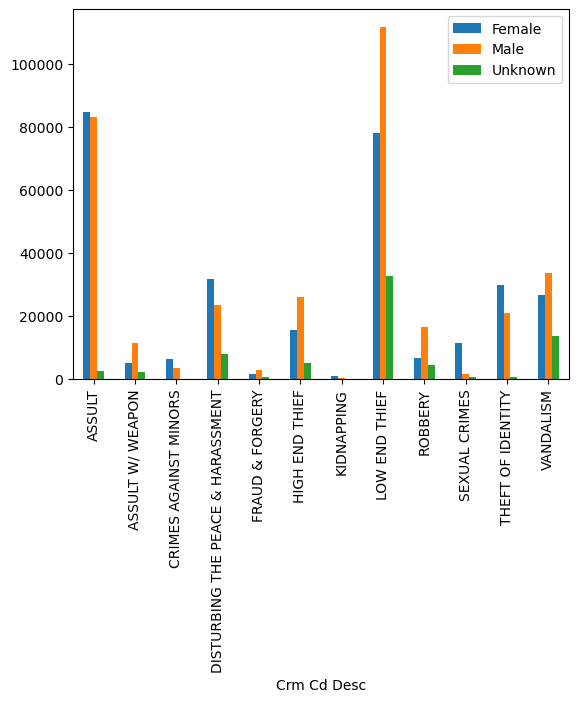

In [53]:
gc_bar = gender_crime.plot.bar()

#creating labels in the bar graph
#for label in gc_bar.containers:
#    gc_bar.bar_label(label)

plt.legend(["Female","Male","Unknown"])

In [54]:
#create bins for age ranges
age_bins = [0,18,30,40,50,60,70,80,90,100]
age_labels= ["0-18","19-25","26-30","31-40","41-50","51-60","61-70","71-80","81-100"]

#This cell continues to work, i thin my jupiter notebook needed an update to process code
LACrime_gender["Vict Age"] = pd.cut(LACrime_gender["Vict Age"], bins=age_bins, labels = age_labels, include_lowest=True)

/var/folders/vf/vmk7hfw95j1f6p8wn00dpk3m0000gn/T/ipykernel_29841/636727663.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LACrime_gender["Vict Age"] = pd.cut(LACrime_gender["Vict Age"], bins=age_bins, labels = age_labels, include_lowest=True)


<h1>Analyzing Crimes Committed Based on Age and Gender</h1>
Is "Age" a significant factor when it comes to Gender?
In order to see if there is a correlation with the crime rate when it comes to age and gender, ages were grouped into ranges and from there we can deduce the number of cases per age range. Based on this, we can see that crime rates spike for young female adults then start to decrease the population gets older. While after turning 21, there tends to be more male cases than females.

In [55]:
LACrime_gender_age = LACrime_gender.groupby(["Vict Age","Vict Sex"]).count()


del LACrime_gender_age["LAT"]
del LACrime_gender_age["LON"]
del LACrime_gender_age["DATE OCC"]
del LACrime_gender_age["TIME OCC"]
del LACrime_gender_age["Crm Cd"]
del LACrime_gender_age["AREA"]
del LACrime_gender_age["AREA NAME"]
del LACrime_gender_age["Crm Cd Desc"]
del LACrime_gender_age["Vict Descent"]
del LACrime_gender_age["Weapon Used Cd"]
del LACrime_gender_age["Weapon Desc"]

gender_age = LACrime_gender_age.pivot_table(index="Vict Age",columns="Vict Sex")

/var/folders/vf/vmk7hfw95j1f6p8wn00dpk3m0000gn/T/ipykernel_29841/3993727059.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  LACrime_gender_age = LACrime_gender.groupby(["Vict Age","Vict Sex"]).count()


<Axes: ylabel='Vict Age'>

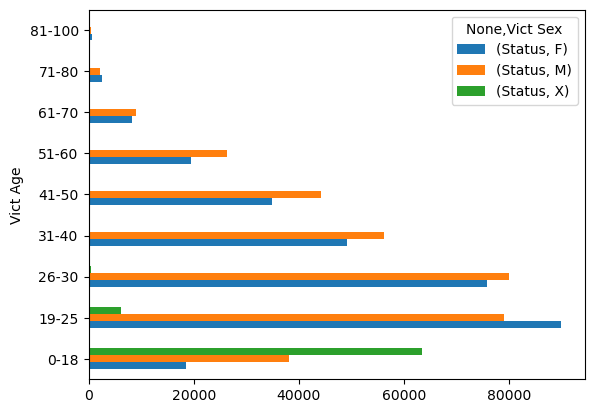

In [56]:
gender_age.plot.barh()

In [57]:
#Deleting the rows where LON & LAT are zero
LACrime_gender_loc = LACrime_gender.query("LON !=0")

LACrime_gender_location = LACrime_gender_loc.groupby(["LON","LAT","Vict Sex"]).count()
del LACrime_gender_location["DATE OCC"]
del LACrime_gender_location["TIME OCC"]
del LACrime_gender_location["Crm Cd"]
del LACrime_gender_location["AREA"]
del LACrime_gender_location["AREA NAME"]
del LACrime_gender_location["Vict Age"]
del LACrime_gender_location["Vict Descent"]
del LACrime_gender_location["Weapon Used Cd"]
del LACrime_gender_location["Weapon Desc"]
del LACrime_gender_location["Crm Cd Desc"]



gender_locations = LACrime_gender_location.pivot_table(index=["LON","LAT"], columns="Vict Sex")
gender_locations.fillna(0,inplace=True)

In [58]:
#Isolate the subcolumn within the pivot table
gender_locations_male = gender_locations[[col for col in gender_locations.columns if "M" in col]]
#Drop all rows with values 0
gender_loc_male = gender_locations_male[~(gender_locations_male == 0).all(axis=1)]

In [59]:
#Isolate the subcolumn within the pivot table
gender_locations_unknown = gender_locations[[col for col in gender_locations.columns if "X" in col]]
#Drop all rows with values 0
gender_loc_unknown = gender_locations_unknown[~(gender_locations_unknown == 0).all(axis=1)]

In [60]:
#Separate the genders to plot them in a scatter to see if there is a large hub of crimes targeted at a specific gender

#Isolate the subcolumn within the pivot table
gender_locations_female = gender_locations[[col for col in gender_locations.columns if "F" in col]]
#Drop all rows with values 0
gender_loc_female = gender_locations_female[~(gender_locations_female == 0).all(axis=1)]

In [61]:
#Obtaining a list of LON and LAT for gender list with no zeros
#Created a csv of the MultiIndex to make it a Dataframe
location_unknown = gender_loc_unknown["Status"].to_csv("coordinates_gender_unknown_crime.csv")
location_female = gender_loc_female["Status"].to_csv("coordinates_gender_female_crime.csv")
location_male =gender_loc_male["Status"].to_csv("coordinates_gender_male_crime.csv")

In [62]:
#Reading the csv files as Dataframe
Coordinates_unknown = pd.concat(map(pd.read_csv, ["coordinates_gender_unknown_crime.csv"]))
Coordinates_female = pd.concat(map(pd.read_csv, ["coordinates_gender_female_crime.csv"]))
Coordinates_male = pd.concat(map(pd.read_csv, ["coordinates_gender_male_crime.csv"]))

Gender Crimes Mapped on Scatter Plot
When considering "Gender" as a factor, our team wanted to look into which areas may have hotspot crime activity for a certain gender. Based on our scatter plots, we can see that there aren't any crime hotspots targeting a specific gender, and that either gender are at risk in most areas.

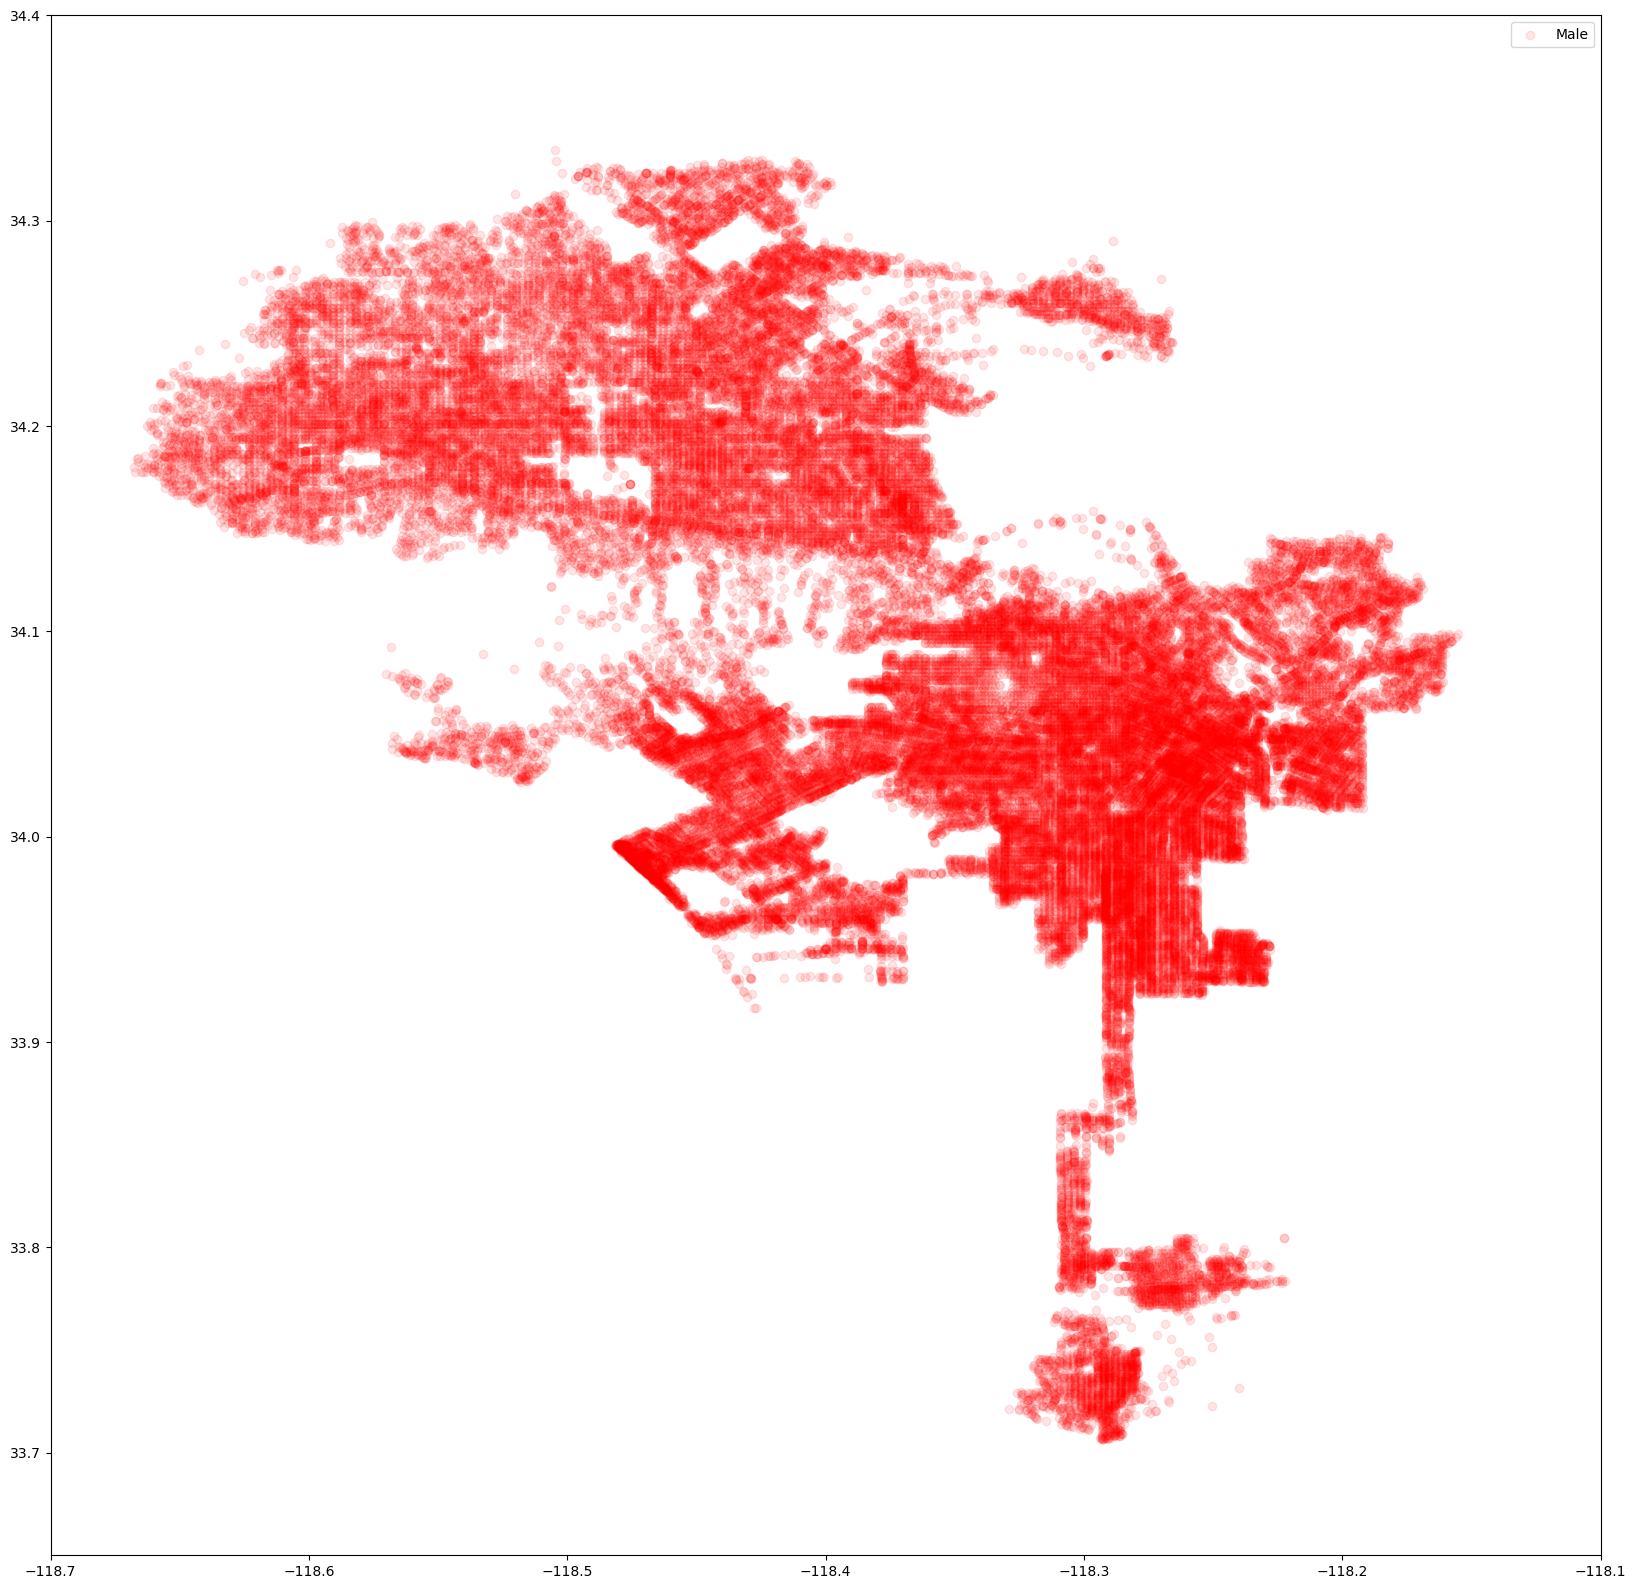

In [63]:
#Now lets plot!
plt.figure(figsize=(20,20))
x = plt.scatter(Coordinates_male["LON"],Coordinates_male["LAT"],color="r",alpha=0.1)
plt.xlim(-118.7, -118.1)
plt.ylim(33.65, 34.4)

plt.legend(["Male"])

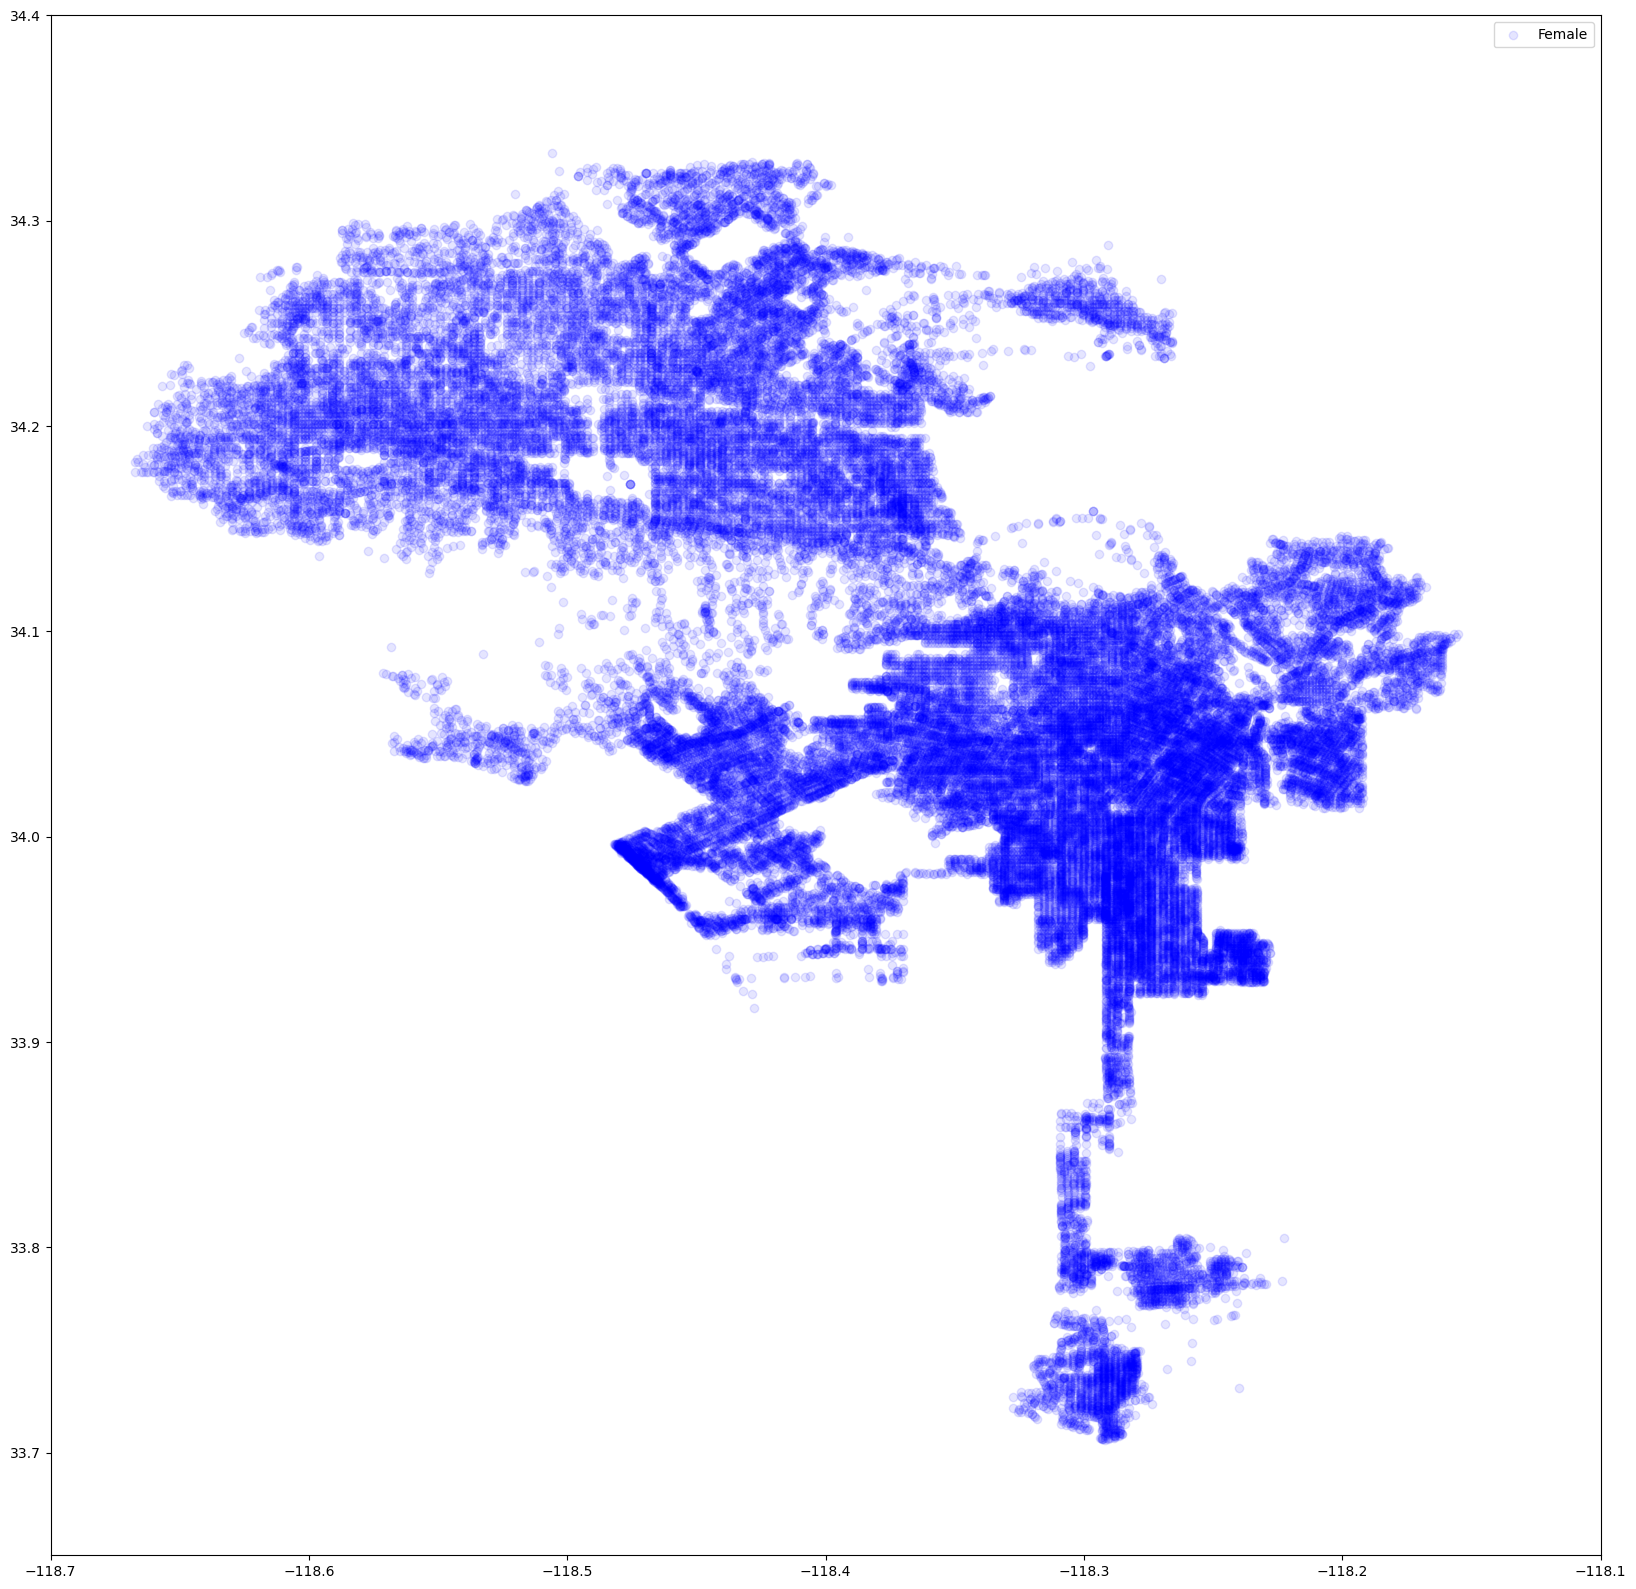

In [64]:
plt.figure(figsize=(20,20))
f = plt.scatter(Coordinates_female["LON"],Coordinates_female["LAT"],color="b",alpha=0.1)
plt.xlim(-118.7, -118.1)
plt.ylim(33.65, 34.4)

plt.legend(["Female"])

<h1>Most Common Crimes Committed</h1>

In [65]:
# time_sortedlapd = lapd_one.groupby("TIME OCC")
# time_sortedlapd.head()
# time_one = summary_lapd.groupby(["TIME OCC"].sort_values())
time_crime = LACrime[["TIME OCC", "AREA NAME", "Crm Cd Desc", "Vict Age", "Vict Sex", "Vict Descent",
                             "Status Desc", "LAT", "LON"]]
time_crime.head()

,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Status Desc,LAT,LON
0,2230,Southwest,BATTERY - SIMPLE ASSAULT,36,F,B,Adult Other,34.0141,-118.2978
1,330,Central,BATTERY - SIMPLE ASSAULT,25,M,H,Invest Cont,34.0459,-118.2545
2,1200,Central,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,0,X,X,Adult Arrest,34.0448,-118.2474
3,1730,N Hollywood,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,W,Invest Cont,34.1685,-118.4019
4,415,Mission,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,X,Invest Cont,34.2198,-118.4468


In [66]:
# Tutorial: Add a Column to a Pandas DataFrame Based on an If-Else Condition from Dataquest online article July 1, 2020
# create a list of our conditions
conditions = [
    (time_crime['TIME OCC'] > 1) & (time_crime['TIME OCC'] <= 59),
    (time_crime['TIME OCC'] >= 100) & (time_crime['TIME OCC'] <= 159),
    (time_crime['TIME OCC'] >= 200) & (time_crime['TIME OCC'] <= 259),
    (time_crime['TIME OCC'] >= 300) & (time_crime['TIME OCC'] <= 359),
    (time_crime['TIME OCC'] >= 400) & (time_crime['TIME OCC'] <= 459),
    (time_crime['TIME OCC'] >= 500) & (time_crime['TIME OCC'] <= 559),
    (time_crime['TIME OCC'] >= 600) & (time_crime['TIME OCC'] <= 659),
    (time_crime['TIME OCC'] >= 700) & (time_crime['TIME OCC'] <= 759),
    (time_crime['TIME OCC'] >= 800) & (time_crime['TIME OCC'] <= 859),
    (time_crime['TIME OCC'] >= 900) & (time_crime['TIME OCC'] <= 959),
    (time_crime['TIME OCC'] >= 1000) & (time_crime['TIME OCC'] <= 1059),
    (time_crime['TIME OCC'] >= 1100) & (time_crime['TIME OCC'] <= 1159),
    (time_crime['TIME OCC'] >= 1200) & (time_crime['TIME OCC'] <= 1259),
    (time_crime['TIME OCC'] >= 1300) & (time_crime['TIME OCC'] <= 1359),
    (time_crime['TIME OCC'] >= 1400) & (time_crime['TIME OCC'] <= 1459),
    (time_crime['TIME OCC'] >= 1500) & (time_crime['TIME OCC'] <= 1559),
    (time_crime['TIME OCC'] >= 1600) & (time_crime['TIME OCC'] <= 1659),
    (time_crime['TIME OCC'] >= 1700) & (time_crime['TIME OCC'] <= 1759),
    (time_crime['TIME OCC'] >= 1800) & (time_crime['TIME OCC'] <= 1859),
    (time_crime['TIME OCC'] >= 1900) & (time_crime['TIME OCC'] <= 1959),
    (time_crime['TIME OCC'] >= 2000) & (time_crime['TIME OCC'] <= 2059),
    (time_crime['TIME OCC'] >= 2100) & (time_crime['TIME OCC'] <= 2159),
    (time_crime['TIME OCC'] >= 2200) & (time_crime['TIME OCC'] <= 2259),
    (time_crime['TIME OCC'] >= 2300) & (time_crime['TIME OCC'] <= 2359)
    ]

# create a list of the values we want to assign for each condition
values = ['0000', '0100', '0200', '0300', '0400', '0500', '0600', '0700', '0800', '0900',
          '1000', '1100', '1200', '1300', '1400', '1500', '1600', '1700', '1800', '1900',
          '2000', ' 2100', '2200', '2300']

# create a new column and use np.select to assign values to it using our lists as arguments
time_crime['Hour'] = np.select(conditions, values)

# >>> df.sort_values(by=['col1'])
#   col1  col2  col3 col4
# 0    A     2     0    a
# 1    A     1     1    B
# 2    B     9     9    c
# 5    C     4     3    F
# 4    D     7     2    e
# 3  NaN     8     4    D
# time_crimesort = time_crime.sort_values(by='TIME OCC')

/var/folders/vf/vmk7hfw95j1f6p8wn00dpk3m0000gn/T/ipykernel_29841/3047557023.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_crime['Hour'] = np.select(conditions, values)


In [67]:
crime_timesummary = time_crime.sort_values(by='TIME OCC')

In [68]:
by_hour = crime_timesummary.groupby(['Hour'])
hour_summary = pd.DataFrame(by_hour[['Hour']].count())
hour_summary = hour_summary.rename(columns={'Hour':'Total per Hour'})

In [69]:
time_doubleohund = crime_timesummary.loc[crime_timesummary['Hour']=="0000"]

In [70]:
doubleo_summary = pd.DataFrame(time_doubleohund[["AREA NAME", "Crm Cd Desc", "Vict Age", "Vict Sex", "Vict Descent", 
                                              "Status Desc"]].mode())

In [71]:
# data = {'col_1': [3, 2, 1, 0], 'col_2': ['a', 'b', 'c', 'd']}
# pd.DataFrame.from_dict(data)
#data for 2100 did not populate, see output "vntun_summary" above.
done = {
        'Hour' : ['0000', '0100', '0200', '0300', '0400', '0500', '0600', '0700', '0800', '0900', '1000', '1100', 
                '1200', '1300', '1400', '1500', '1600', '1700', '1800', '1900', '2000', '2100', '2200', '2300'],
        'Crimes per Hour' : [19400, 24654, 20829, 18158, 15374, 14172, 18671, 20971, 29947, 29236, 34732, 35179,
                            55054, 36641, 39516, 42293, 42628, 47097, 48165, 44433, 45105, 41216, 39834, 34147],
        'Area Name' : ['Central', 'Central', 'Central', '77th Street', 'Central', 'Central', '77th Street', 'Central',
                       '77th Street', 'Central', 'Central', 'Central', 'Pacific', 'Central', 'Central', 'Central',
                       'Central', 'Central', 'Central', 'Central', 'Central', 'NULL', 'Central', 'Central'],
        'Crm Cd Desc' : ['THEFT OF IDENTITY', 'VEHICLE – STOLEN', 'BURGLARY', 'BURGLARY', 'BURGLARY', 'VEHICLE – STOLEN', 
                         'THEFT OF IDENTITY', 'VEHICLE – STOLEN', 'THEFT OF IDENTITY', 'THEFT OF IDENTITY', 
                         'BATTERY – SIMPLE ASSAULT', 'BATTERY – SIMPLE ASSAULT', 'THEFT OF IDENTITY', 'BATTERY – SIMPLE ASSAULT',
                         'BATTERY – SIMPLE ASSAULT', 'BATTERY – SIMPLE ASSAULT', 'VEHICLE – STOLEN', 'VEHICLE – STOLEN',
                         'VEHICLE – STOLEN', 'VEHICLE – STOLEN', 'VEHICLE – STOLEN', 'NULL', 'VEHICLE – STOLEN',
                         'VEHICLE – STOLEN'],
        'Vict Sex' : ['M', 'M', 'M', 'M', 'M', 'M', 'F', 'F', 'F', 'M', 'M', 'M', 'F', 'M', 'M', 'M', 'M', 'M', 'M',
                      'M', 'M', 'NULL', 'M', 'M'],
        'Status Desc' : ['H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H',
                         'H', 'H', 'NULL', 'H', 'H']
}

summary_time = pd.DataFrame(data=done)

In [72]:
labels = ['THEFT OF IDENTITY', 'VEHICLE – STOLEN', 'BURGLARY', 'BATTERY – SIMPLE ASSAULT' ]
sizes = [5, 10, 3, 5]
colors = ['pink', 'red', 'lightblue', 'lightcoral']
explode = (0, 0, 0, 0)    

<function matplotlib.pyplot.show(close=None, block=None)>

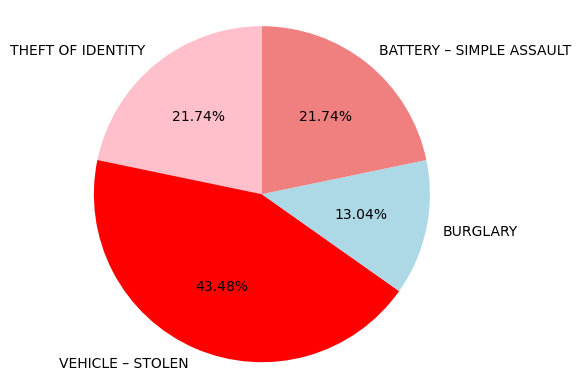

In [73]:
plt.pie(sizes, explode=explode, labels=labels, autopct="%0.2f%%", colors=colors, startangle =90)
plt.axis("equal")

plt.show